In [1]:
# Import data analysis libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

#### My goal is to analyze aviation accidents in the United States, as well as to determine what the most common reasons for them are.

## Data Exploration

In [2]:
# Read dataset
path = os.path.join('..', 'Aviations_Accidents', 'Data', 'AviationData.csv')
data = pd.read_csv(path, encoding='ISO-8859-1')


/var/folders/4h/y4khv0tn75l0yw98wz0bhhq40000gn/T/ipykernel_3236/3034736042.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding='ISO-8859-1')


In [3]:
data.shape

(88889, 31)

In [4]:
data.iloc[:, :16].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501


In [5]:
data.iloc[:, 16:].head()

,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### Data cleansing

In [8]:
# Check for duplicate rows
print(data.duplicated().sum())


0


In [9]:
# count the number of NaN values in columns (%)
data.isnull().sum()/len(data)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [10]:
# removing columns which have more than 30% missing data (exception is column ‘'Broad.phase.of.flight', because it looks like important column), columns which I think aren't important for my analysis and  rows which have more than 3 NaN values 
data = data.drop(['Event.Id', 'Accident.Number', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name','Registration.Number','Model', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Report.Status','Publication.Date'], axis = 1)
data.dropna(thresh=14, inplace=True)
data.reset_index(drop=True)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82920,Accident,2022-12-12,"Knoxville, TN",United States,Non-Fatal,Substantial,CESSNA,No,1.0,NaN,Instructional,0.0,0.0,0.0,1.0,VMC,NaN
82921,Accident,2022-12-12,"Redding, CA",United States,Minor,Substantial,AIRBUS HELICOPTERS,No,1.0,NaN,Business,0.0,1.0,0.0,0.0,NaN,NaN
82922,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,CIRRUS DESIGN CORP,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
82923,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,CESSNA,No,1.0,NaN,Personal,0.0,1.0,0.0,0.0,VMC,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82925 entries, 0 to 88886
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      82925 non-null  object 
 1   Event.Date              82925 non-null  object 
 2   Location                82894 non-null  object 
 3   Country                 82713 non-null  object 
 4   Injury.Severity         82892 non-null  object 
 5   Aircraft.damage         81356 non-null  object 
 6   Make                    82915 non-null  object 
 7   Amateur.Built           82924 non-null  object 
 8   Number.of.Engines       80835 non-null  float64
 9   Engine.Type             80248 non-null  object 
 10  Purpose.of.flight       81166 non-null  object 
 11  Total.Fatal.Injuries    73383 non-null  float64
 12  Total.Serious.Injuries  72644 non-null  float64
 13  Total.Minor.Injuries    73373 non-null  float64
 14  Total.Uninjured         78238 non-null

In [12]:
# function which return unique values and count them
def check_value_counts (df, col):
       for i in col:
              print(df[i].unique())
              print(df[i].value_counts())
              print('\nsum of NaN values: {0}'.format(data[i].isnull().sum()))
              print('\n-----\n')

In [13]:

list_of_columns = list(data.columns)
check_value_counts(data, list_of_columns)


['Accident' 'Incident']
Accident    80821
Incident     2104
Name: Investigation.Type, dtype: int64

sum of NaN values: 0

-----

['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-14' '2022-12-16'
 '2022-12-26']
1982-05-16    25
1984-06-30    25
1984-08-25    24
1983-08-05    24
1983-06-05    24
              ..
2014-02-06     1
2014-02-01     1
2014-01-20     1
2014-01-19     1
2022-12-26     1
Name: Event.Date, Length: 14622, dtype: int64

sum of NaN values: 0

-----

['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ...
 'Guantanamo Bay, OF' 'Regent, ND' 'Woodsfield, OH']
ANCHORAGE, AK      427
MIAMI, FL          199
ALBUQUERQUE, NM    191
HOUSTON, TX        187
CHICAGO, IL        175
                  ... 
TIJERAS, NM          1
FINKSBURG, MD        1
SUGARTOWN, LA        1
ELDERSBURG, MD       1
Woodsfield, OH       1
Name: Location, Length: 24540, dtype: int64

sum of NaN values: 31

-----

['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'B

In [14]:
#deleting data before 1982, because there isn't enough information to analises previous years.
data.sort_values(by='Event.Date').head(20)
data = data.drop(index=list(data[data['Event.Date']<'1982'].index.values.tolist())).reset_index(drop=True)

#creating new columns 'Month' and 'Year' and deleting days
data['Year'] = [int(i.split('-')[0]) for i in data['Event.Date']]
data['Month'] = [int(i.split('-')[1]) for i in data['Event.Date']]
del data['Event.Date']

#using method title() to capitalize the first character in every word 
data['Make'] = data['Make'].str.title()

#deleting rows where country is not USA and deleting whole column 'Country'
data = data.drop(index=list(data[data['Country'] != 'United States'].index.values.tolist())).reset_index(drop=True)
del data['Country']

#creating a new column 'State' and deleting column 'Location'
data['State'] = data['Location'].str.split(',').str[1]
data = data.dropna(subset=('State') ).reset_index(drop=True)
del data['Location']

#removing rows which don't have information about injury
data['Injury.Severity'].fillna('Unavailable',inplace=True)
data = data.drop(index=list(data[data['Injury.Severity'] == 'Unavailable'].index.values.tolist())).reset_index(drop=True)


In [15]:
#changing data type for column 
data['Number.of.Engines'] = data['Number.of.Engines'].astype('float64')

#removing amount of injuries
data['Injury.Severity'] = data['Injury.Severity'].str.split('(').str[0]

#creating a common name for unknown values
data['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True)
data['Engine.Type'].replace(to_replace = ['NONE', 'none', 'UNK'], value = 'Unknown', inplace = True)


#filling in missing values with the mode
data['Number.of.Engines'].fillna(value=(data['Number.of.Engines'].mode()[0]), inplace=True)
data['Total.Fatal.Injuries'].fillna(value=(data['Total.Fatal.Injuries'].mode()[0]), inplace=True)
data['Total.Serious.Injuries'].fillna(value=(data['Total.Serious.Injuries'].mode()[0]), inplace=True)
data['Total.Minor.Injuries'].fillna(value=(data['Total.Minor.Injuries'].mode()[0]), inplace=True)
data['Total.Uninjured'].fillna(value=(data['Total.Uninjured'].mode()[0]), inplace=True)

#filling in missing values with 'Unknown'
data['Make'].fillna('Unknown',inplace=True)
data['Aircraft.damage'].fillna('Unknown',inplace=True)
data['Purpose.of.flight'].fillna('Unknown',inplace=True)
data['Weather.Condition'].fillna('Unknown',inplace=True)
data['Engine.Type'].fillna('Unknown',inplace=True)
data['Broad.phase.of.flight'].fillna('Unknown',inplace=True)

In [16]:
# using for loop to:
# 1)  remove rows which have value '0' in columns 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured' (assume that it is a mistake)
# 2) remove rows which have value 'Non-Fatal' in column 'Injury.Severity' and have some number of fatal injuries(death).
# 3) remove rows which have value 'Fatal' in column 'Injury.Severity' and don’t have some number of fatal Injuries(death) 

drop_list = list()
for index, row in data[['Injury.Severity','Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].iterrows():
    if row[1] == 0 and row[2] == 0 and row[3] == 0 and row[4] == 0:
        drop_list.append(index)
    if row[0] == 'Non-Fatal' and row[1] > 0 and row[4] >=1:
        drop_list.append(index)
    if row[0] == 'Fatal' and row[1] <= 0 and row[4]>0:
        drop_list.append(index)
data = data.drop(index=drop_list).reset_index(drop=True)  
data

,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year,Month,State
0,Accident,Non-Fatal,Substantial,Cessna,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,1982,1,WA
1,Accident,Non-Fatal,Substantial,Cessna,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,1982,1,NJ
2,Accident,Non-Fatal,Substantial,North American,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,1982,1,FL
3,Accident,Non-Fatal,Substantial,Piper,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,1982,1,NM
4,Accident,Non-Fatal,Substantial,Beech,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,1982,1,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80493,Accident,Non-Fatal,Substantial,Cessna,No,1.0,Unknown,Instructional,0.0,0.0,0.0,1.0,VMC,Unknown,2022,12,TN
80494,Accident,Minor,Substantial,Airbus Helicopters,No,1.0,Unknown,Business,0.0,1.0,0.0,0.0,Unknown,Unknown,2022,12,CA
80495,Accident,Non-Fatal,Substantial,Cirrus Design Corp,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,2022,12,PR
80496,Accident,Minor,Substantial,Cessna,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,Unknown,2022,12,FL


In [17]:
data.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Month
count,80498.000000,80498.000000,80498.000000,80498.000000,80498.000000,80498.000000,80498.000000
mean,1.126947,0.362481,0.222403,0.291933,3.439030,1998.229633,6.587133
std,0.407572,2.038757,1.074069,1.232732,20.564372,11.681337,3.032116
min,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,4.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000,7.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2008.000000,9.000000
max,8.000000,230.000000,137.000000,125.000000,699.000000,2022.000000,12.000000


## Visualisation Data Analysis

/var/folders/4h/y4khv0tn75l0yw98wz0bhhq40000gn/T/ipykernel_3236/1988088880.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

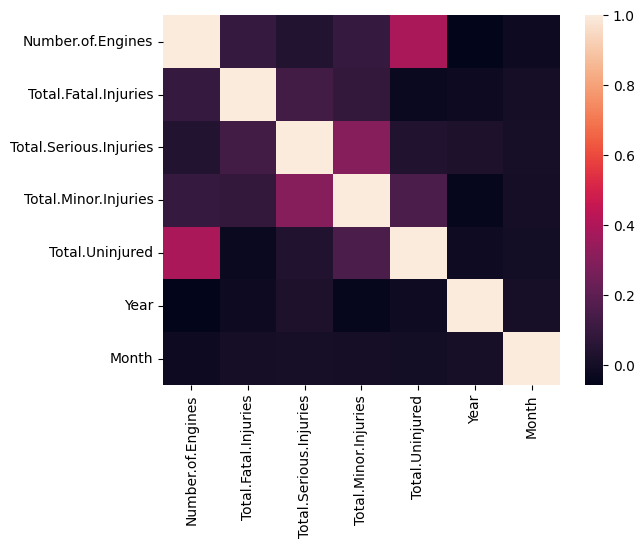

In [18]:
# see there are no correlations
sns.heatmap(data.corr())

In [19]:
# function that returns numeric features from DF
def get_quant_features(dataframe):
    feats = dataframe.select_dtypes([np.number]).columns
    return [x for x in feats]

feats = get_quant_features(data)

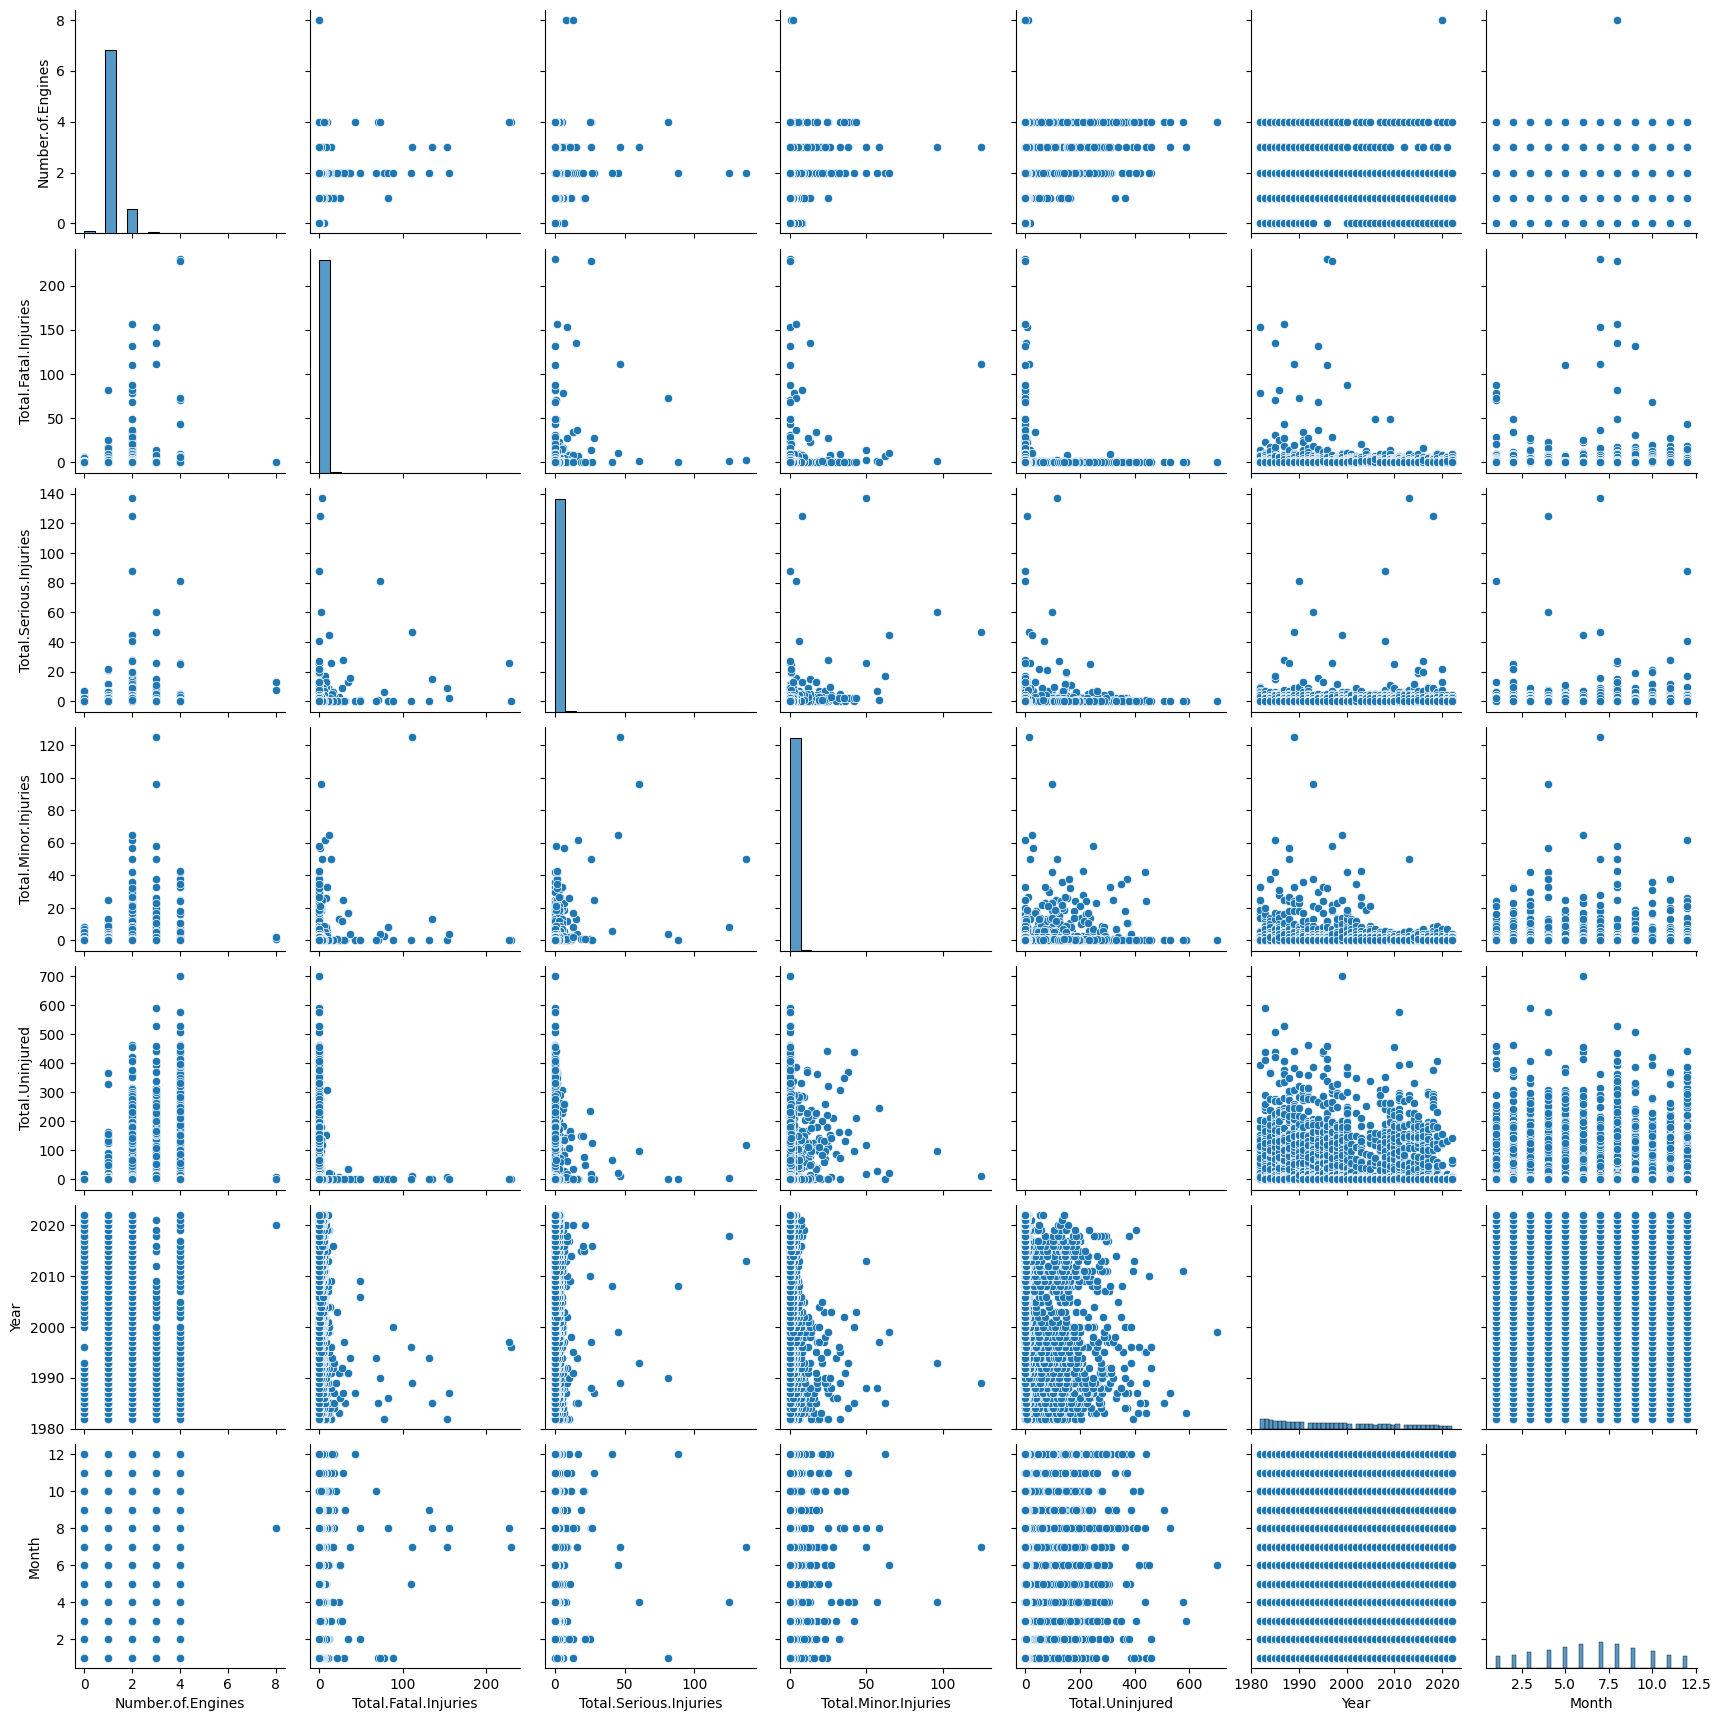

In [20]:
sns.pairplot(data[feats])

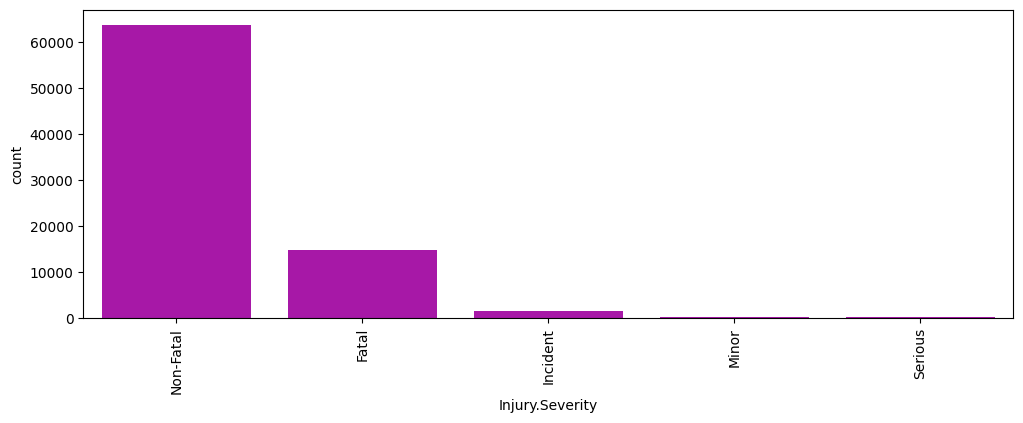

Non-Fatal    63796
Fatal        14803
Incident      1566
Minor          192
Serious        141
Name: Injury.Severity, dtype: int64


In [21]:
#number of accidents (can see that the ratio of cases is almost 3:1 (Non- Fatal:Fatal)). It's why I create new column 'Category' with values: 'Fatal' and 'Non-Fatal'

plt.figure(figsize=(12, 4))
sns.countplot(x = 'Injury.Severity', order = data['Injury.Severity'].value_counts().index, color = 'm', data = data)
plt.xticks(rotation=90)
plt.show()

print(data['Injury.Severity'].value_counts())


Non-Fatal    65695
Fatal        14803
Name: Category, dtype: int64


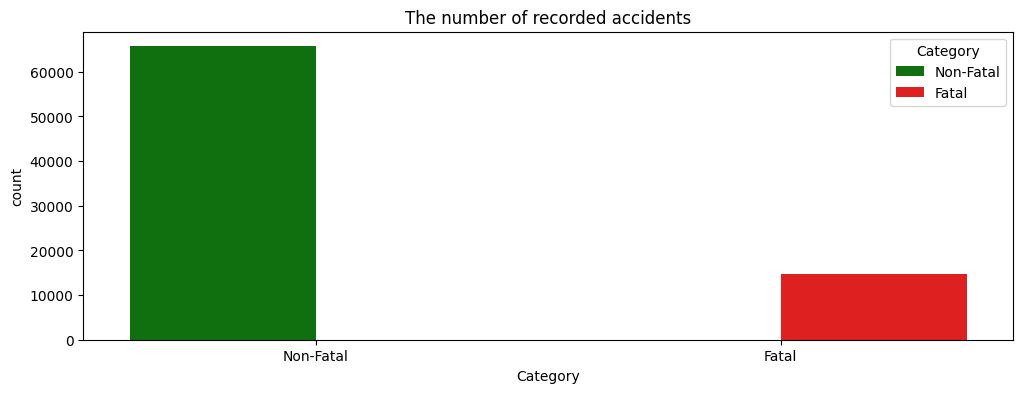

In [22]:
#create a new column and get the count of each category
data['Category'] = data['Injury.Severity']
data['Category'].replace(to_replace = ['Incident','Minor','Serious' ], value = 'Non-Fatal', inplace = True)
print(data['Category'].value_counts())

plt.figure(figsize=(12, 4))
sns.countplot(x = 'Category', order = data['Category'].value_counts().index, data=data, hue = 'Category', palette= [ 'g', 'r'])
plt.title('The number of recorded accidents');

In [33]:
#analysis based on charts for most columns to decide which columns to analyze more thoroughly
data['Total.Injured'] = data['Total.Serious.Injuries'] + data['Total.Minor.Injuries']  # which includes the sum of all the injured
columns_y = ('Total.Fatal.Injuries', 'Total.Injured', 'Total.Uninjured' )
columns_x = ( 'Broad.phase.of.flight', 'Aircraft.damage', 'Amateur.Built', 'Number.of.Engines', 
                      'Engine.Type', 'Purpose.of.flight', 'Weather.Condition')

In [34]:
#creating new DF
top15_make = data['Make'].value_counts().nlargest(15).index.tolist()
top15_state = data['State'].value_counts().nlargest(15).index.tolist()

top15_make = data[data['Make'].isin(top15_make)]
top15_state = data[data['State'].isin(top15_state)]

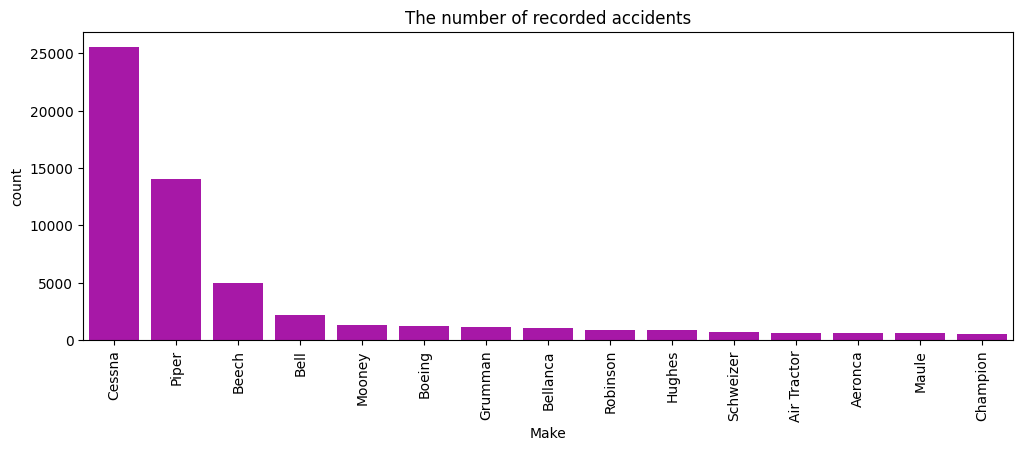

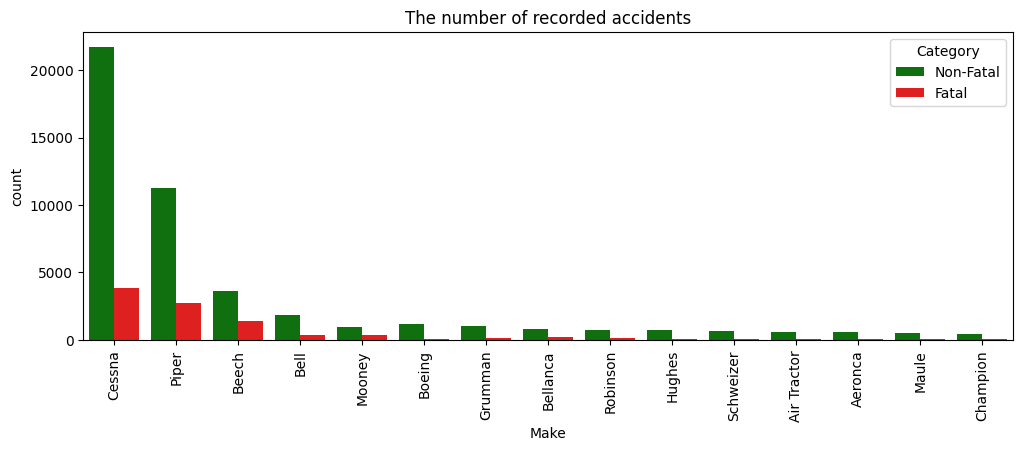

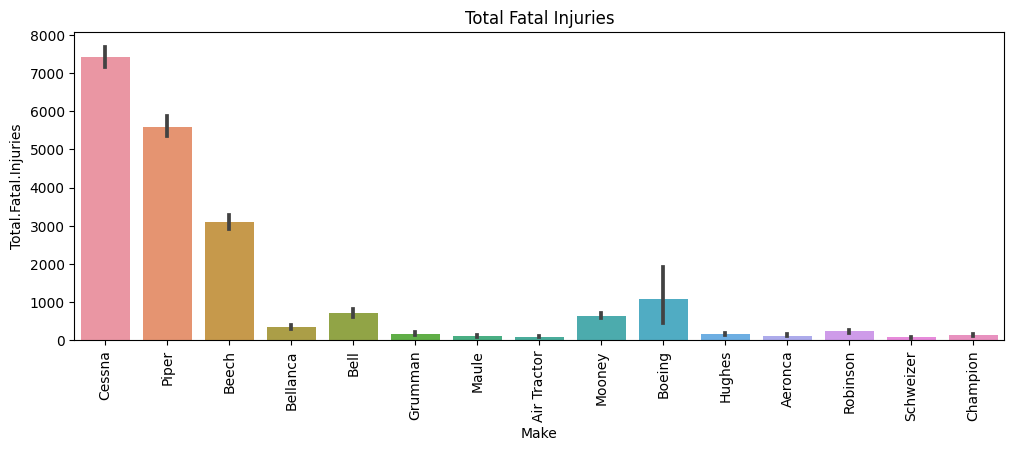

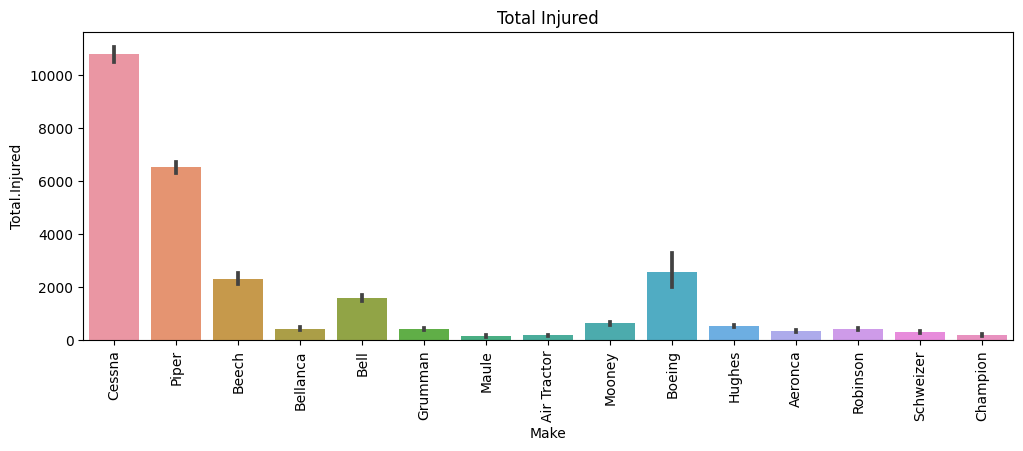

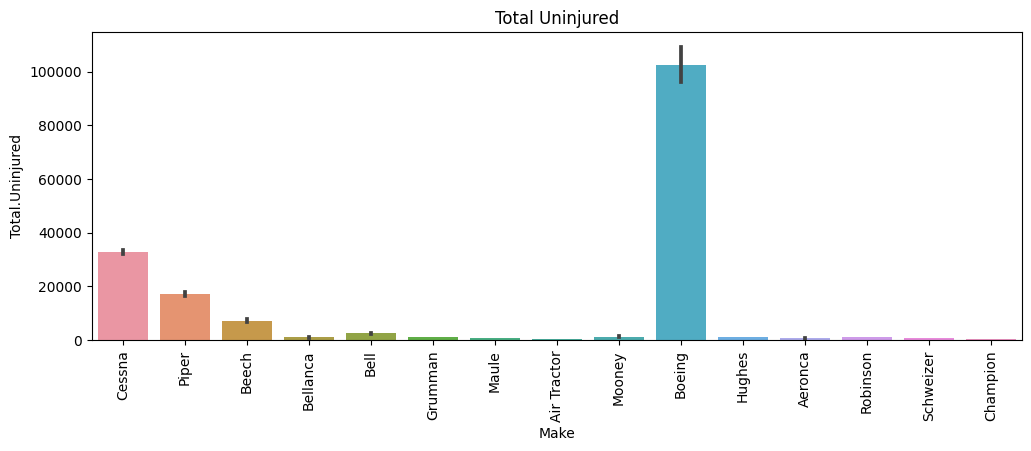

In [35]:
# top 15 make 

plt.figure(figsize=(12, 4))
sns.countplot(x = 'Make', order = top15_make['Make'].value_counts().index, color = 'm', data = top15_make)
plt.title('The number of recorded accidents')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 4))
sns.countplot(x = 'Make', order = top15_make['Make'].value_counts().index, hue = 'Category', palette= [ 'g', 'r'], data = top15_make)
plt.xticks(rotation=90)
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);
for y in columns_y:
    plt.figure(figsize=(12, 4))
    sns.barplot(x='Make', y = y, data=top15_make, estimator=sum)
    plt.title ('{0}'.format(y.replace('.', ' ')))
    plt.xticks(rotation=90);

In [36]:
fatal_make_df = top15_make[top15_make['Category'] == 'Fatal']
percentage_of_fatalities_make = fatal_make_df['Make'].value_counts().sort_index(ascending=True) /top15_make['Make'].value_counts().sort_index(ascending=True)*100
percentage_of_fatalities_make.sort_values(ascending=False)

Beech          27.783350
Mooney         27.329193
Bellanca       20.366795
Piper          19.624306
Champion       16.569201
Bell           16.433409
Robinson       15.697036
Cessna         15.092792
Air Tractor    13.219285
Aeronca        12.480253
Hughes         12.384259
Maule          10.260870
Grumman        10.114336
Schweizer       8.262108
Boeing          5.414274
Name: Make, dtype: float64

 #### The Cessna aircraft manufacturer stands out from the rest because it had the most accidents. But despite this, the second graph shows that the number of fatalities is not much higher than the cases at the Piper manufacturer, which had less registred accidents. And when we see the statistics of the percentage of fatalities category, the ranking looks slightly different.

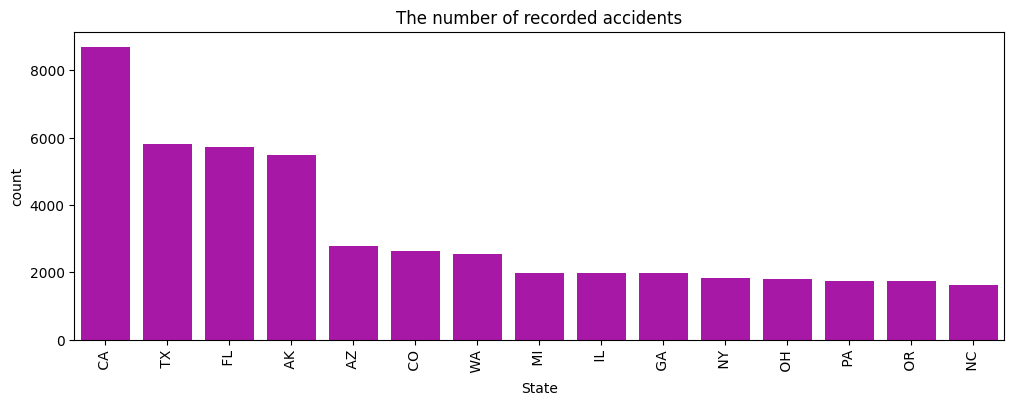

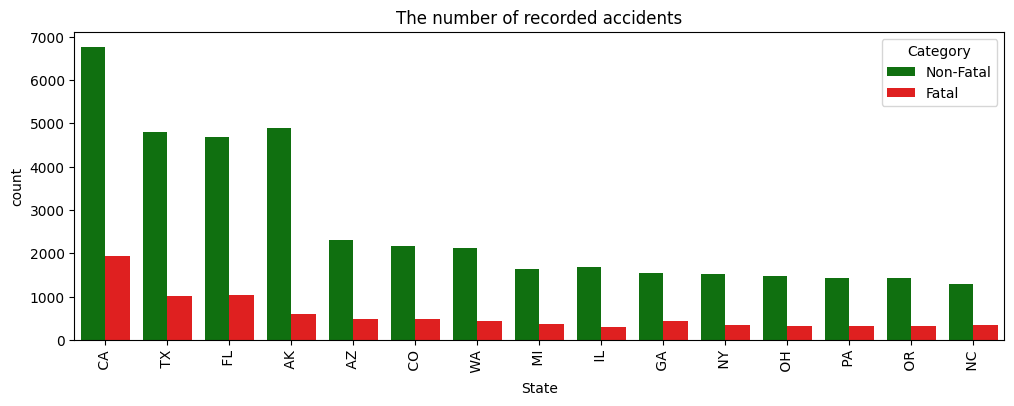

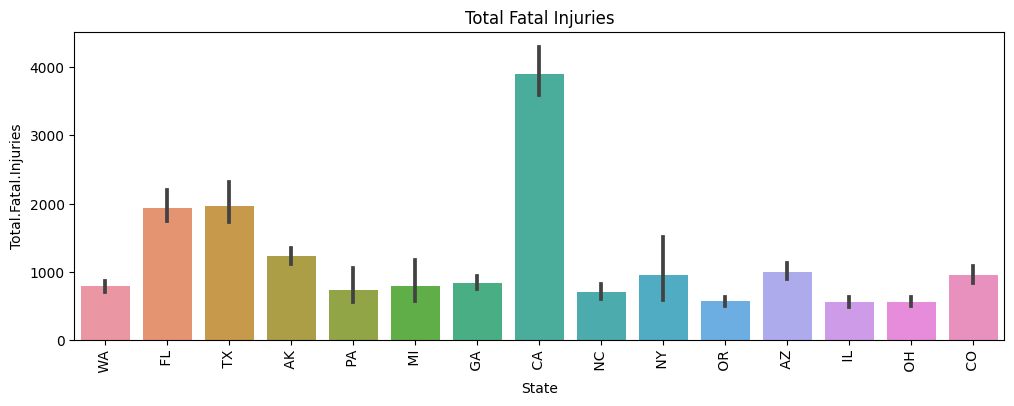

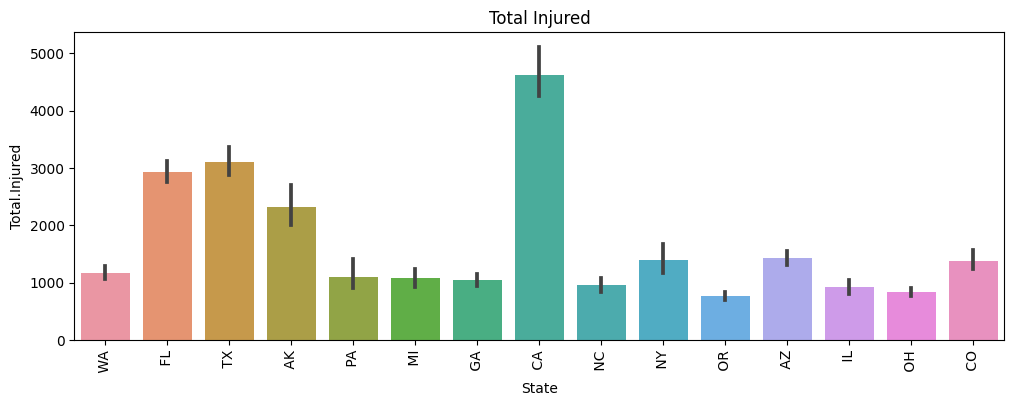

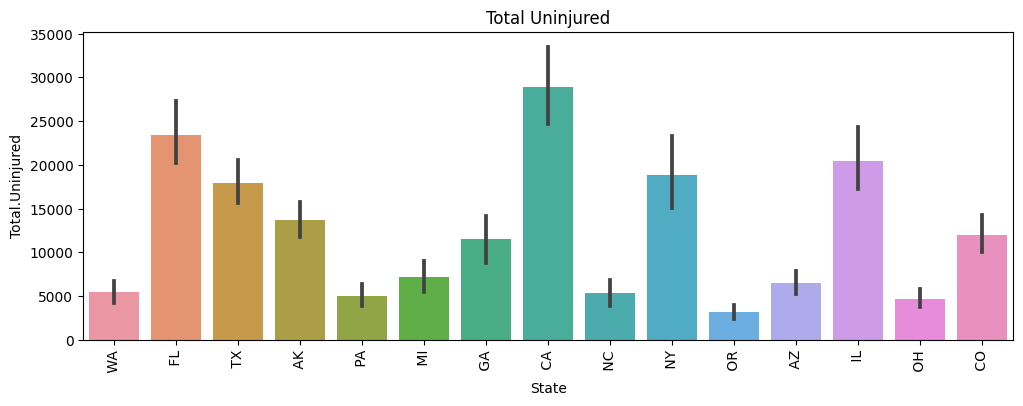

In [37]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'State', order = top15_state['State'].value_counts().index, color = 'm', data = top15_state)
plt.xticks(rotation=90)
plt.title('The number of recorded accidents')
plt.show()
plt.figure(figsize=(12, 4))
sns.countplot(x = 'State', order = top15_state['State'].value_counts().index, hue = 'Category', palette= [ 'g', 'r'], data = top15_state)
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);
for y in columns_y:
    plt.figure(figsize=(12, 4))
    sns.barplot(x='State', y = y, data=top15_state, estimator=sum)
    plt.title ('{0}'.format(y.replace('.', ' ')))
    plt.xticks(rotation=90);

In [38]:
print(top15_state['State'].value_counts().head(7))
print(top15_state['State'].value_counts()/top15_make.shape[0]*100)

 CA    8709
 TX    5823
 FL    5718
 AK    5490
 AZ    2779
 CO    2631
 WA    2562
Name: State, dtype: int64
 CA    15.449707
 TX    10.329963
 FL    10.143693
 AK     9.739223
 AZ     4.929927
 CO     4.667376
 WA     4.544971
 MI     3.535569
 IL     3.535569
 GA     3.516055
 NY     3.278340
 OH     3.184318
 PA     3.109810
 OR     3.097392
 NC     2.896931
Name: State, dtype: float64


#### The most accidents occurred in the state of California, and slightly fewer in the states of Texas, Florida and Alaska, which may be due to the fact that these are tourist states where people often fly for vacation.

In [39]:
#define a function that draws: 
#1)countplot for all accidents, 
#2) coutplot with parametr 'hue' 
#3) barplot with 'estimator=sum'
def draw_charts (data, columns_x, columns_y, hue ):
    for col in columns_x:  
       plt.figure(figsize=(12, 4))
       sns.countplot(x = col, order = data[col].value_counts().index, color = 'm', data = data)
       plt.xlabel('{0}'.format(col.replace('.', ' ')))
       plt.ylabel ('Count')
       plt.title('The number of recorded accidents')
       plt.xticks(rotation=90)
       plt.show()  

       plt.figure(figsize=(12, 4))
       sns.countplot(x = col, order = data[col].value_counts().index, data=data, hue = hue, palette= [ 'g', 'r'])
       plt.xlabel('{0}'.format(col.replace('.', ' ')))
       plt.ylabel ('Count')
       plt.title('The number of recorded accidents')
       plt.xticks(rotation=90);
       
       for y in columns_y: 
              plt.figure(figsize=(12, 4))
              sns.barplot(x=col, y=y, data=data, estimator=sum)
              plt.title ('{0}'.format(y.replace('.', ' ')))
              plt.xlabel('{0}'.format(col.replace('.', ' ')))
              plt.ylabel('{0}'.format(y.replace('.', ' ')))
              plt.xticks(rotation=90)
              plt.show()

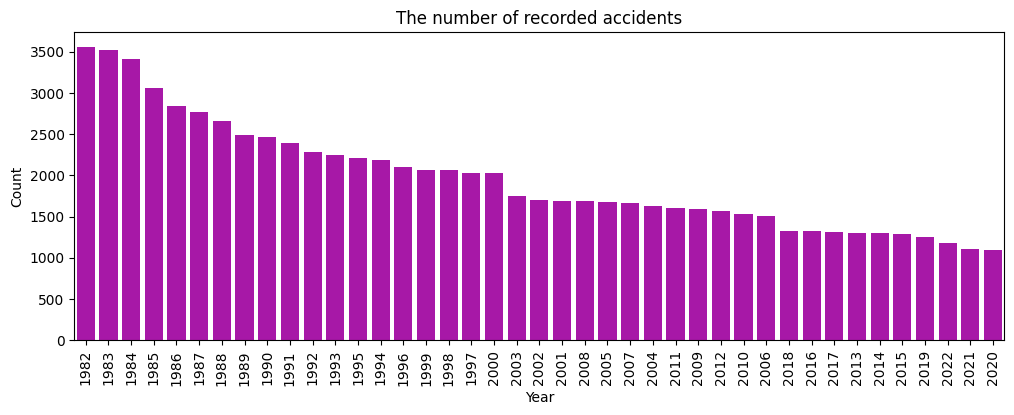

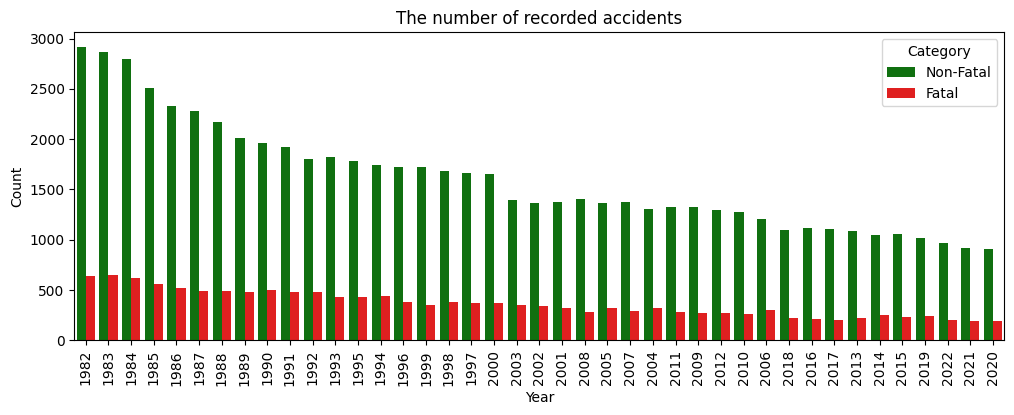

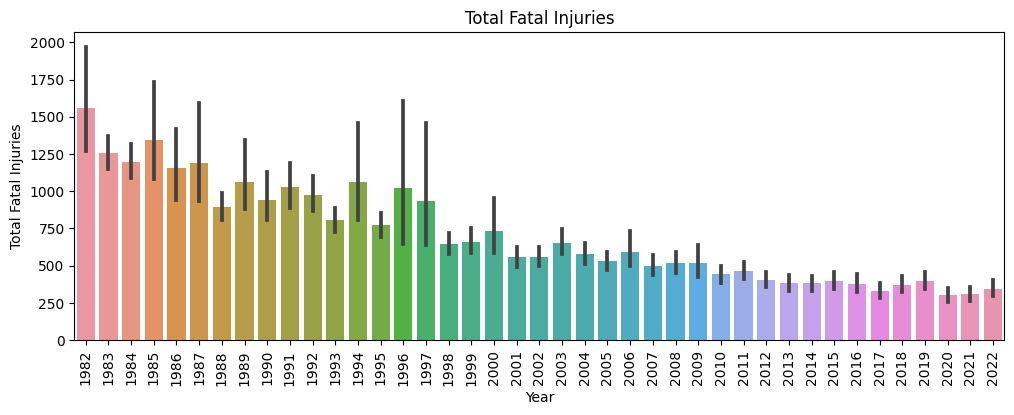

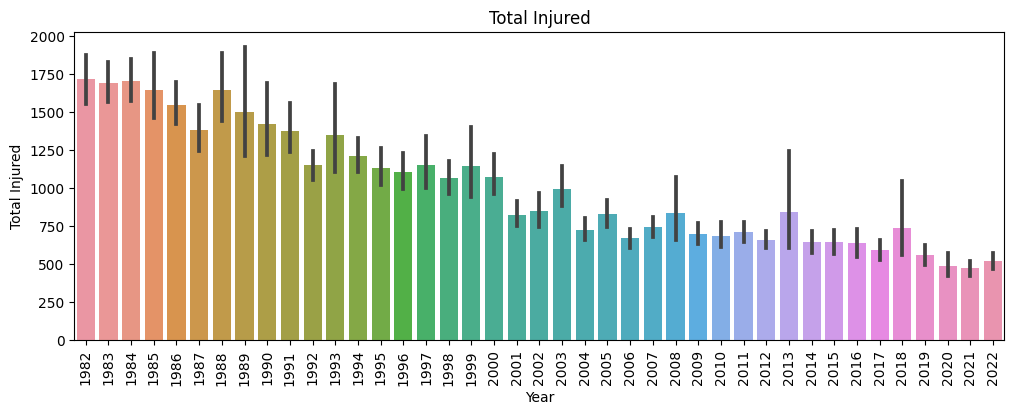

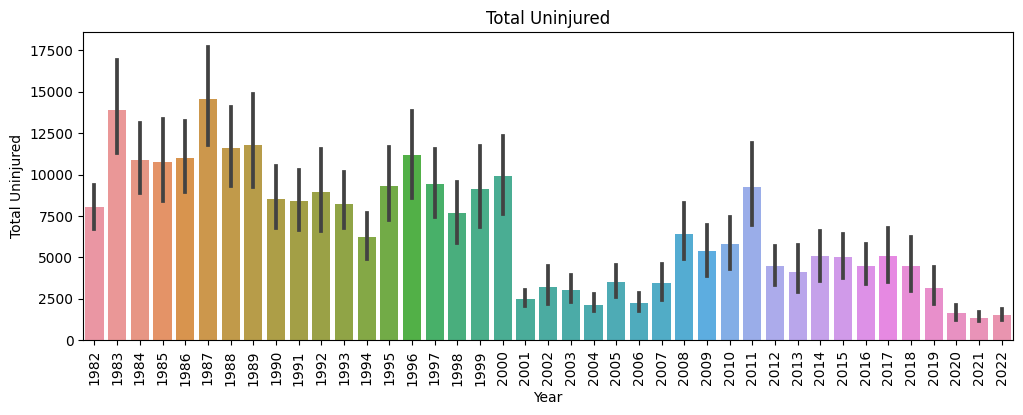

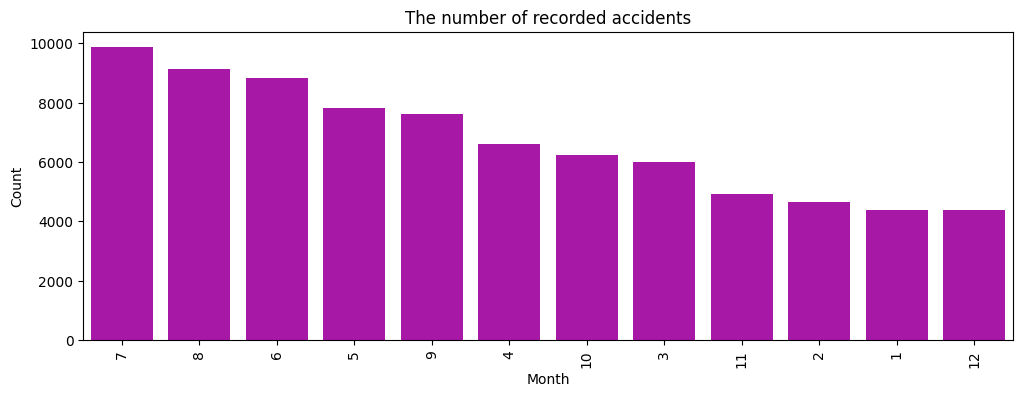

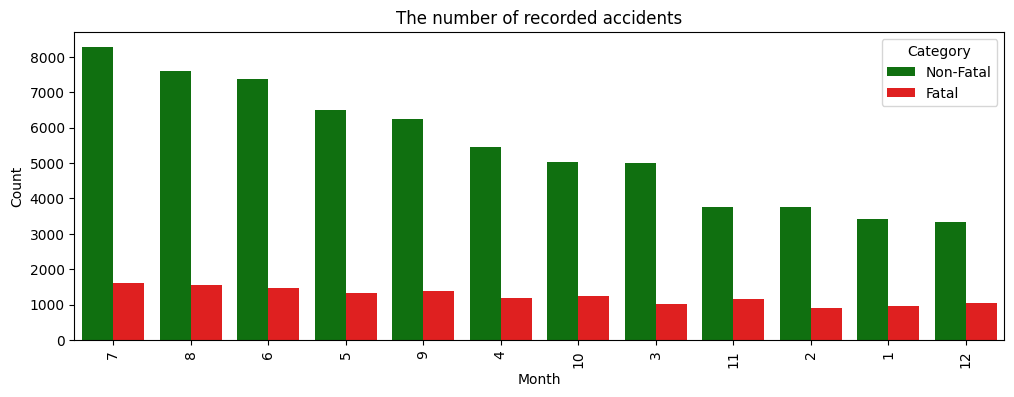

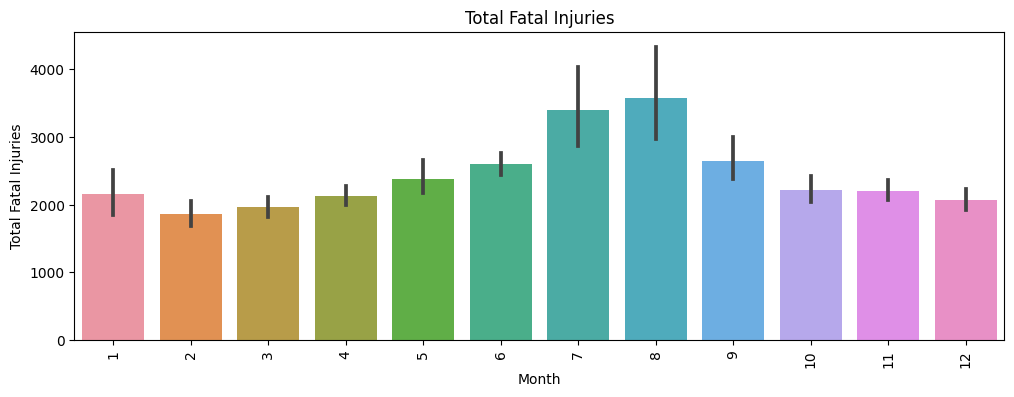

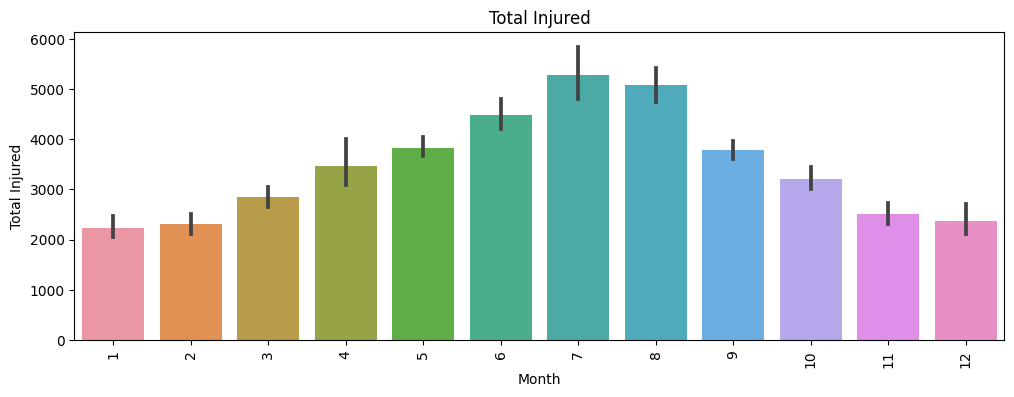

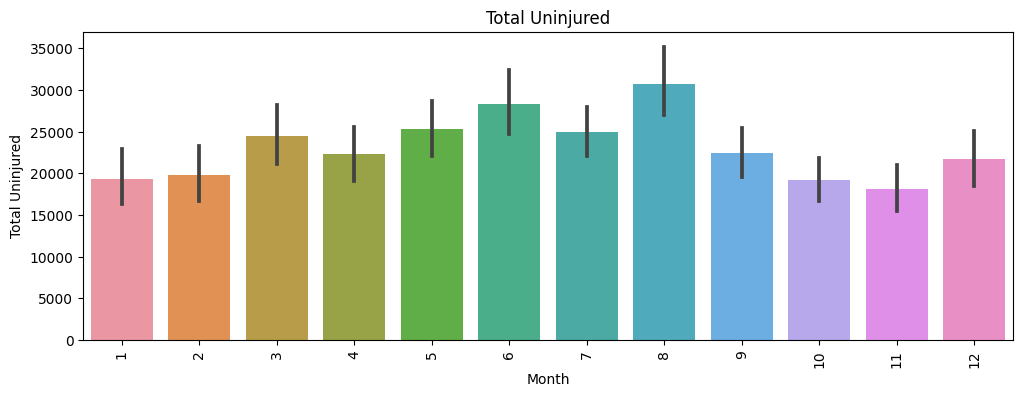

In [40]:
#drowing 
draw_charts (data, ('Year', "Month"), columns_y, ('Category'))

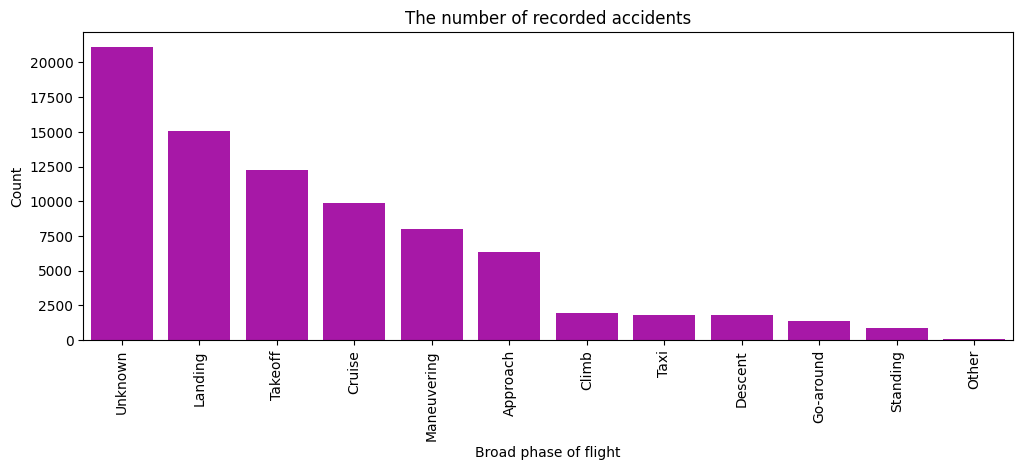

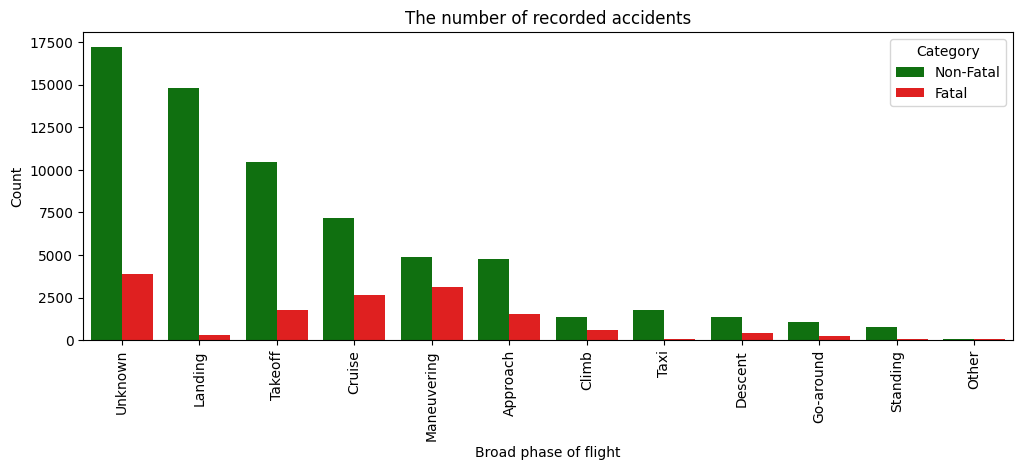

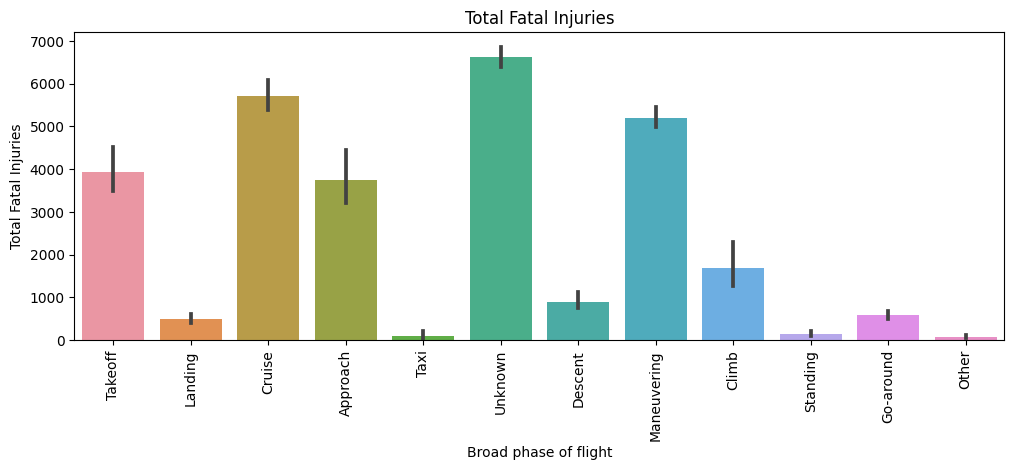

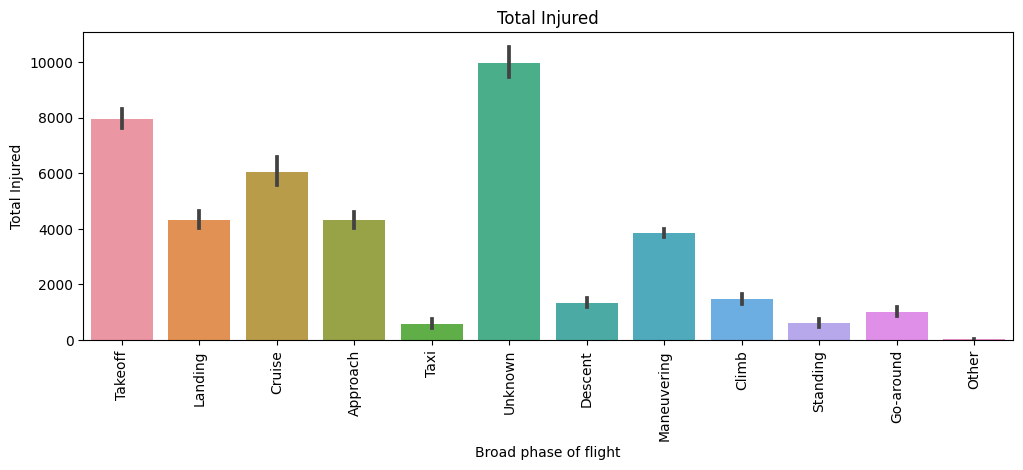

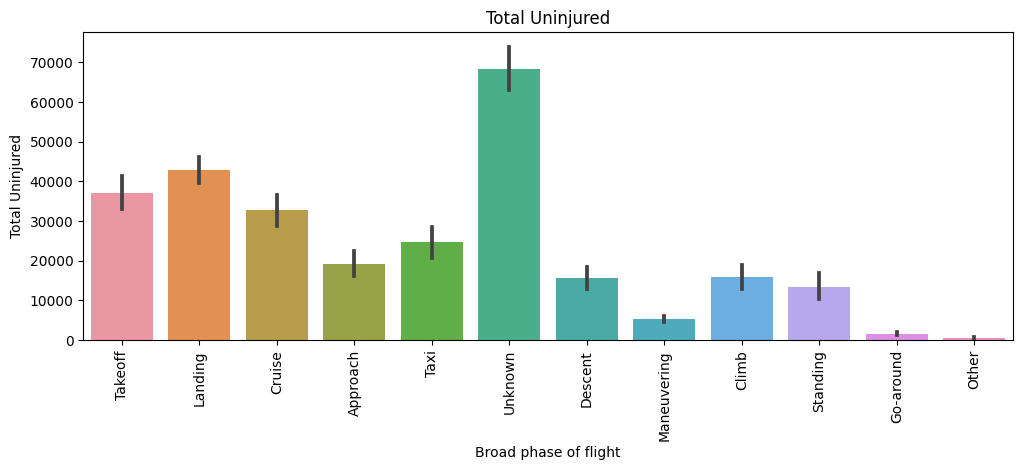

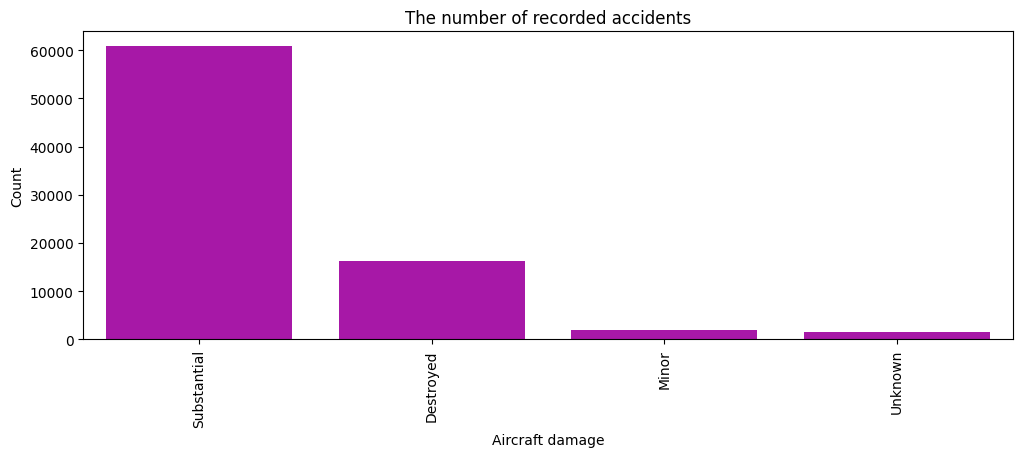

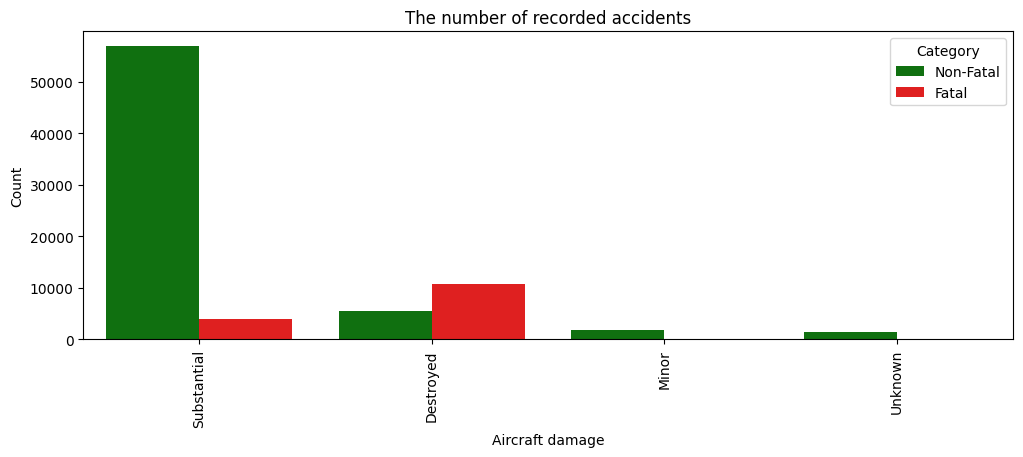

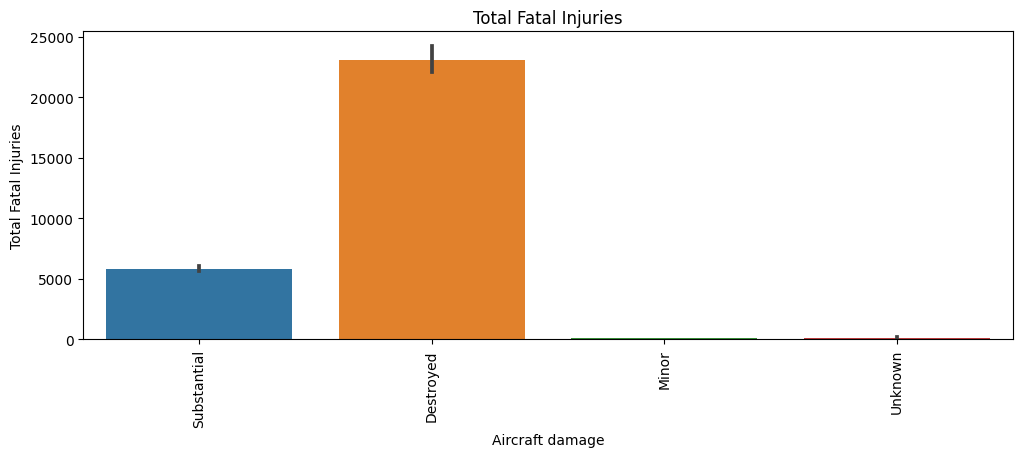

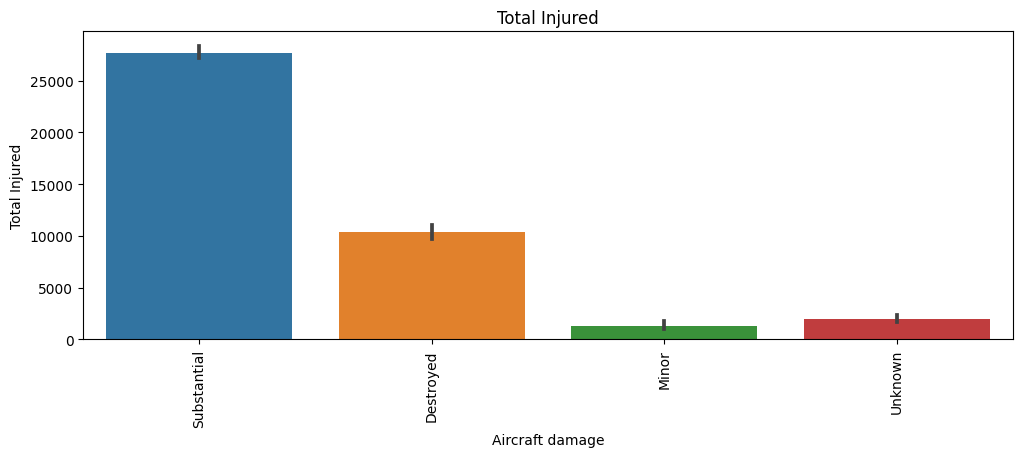

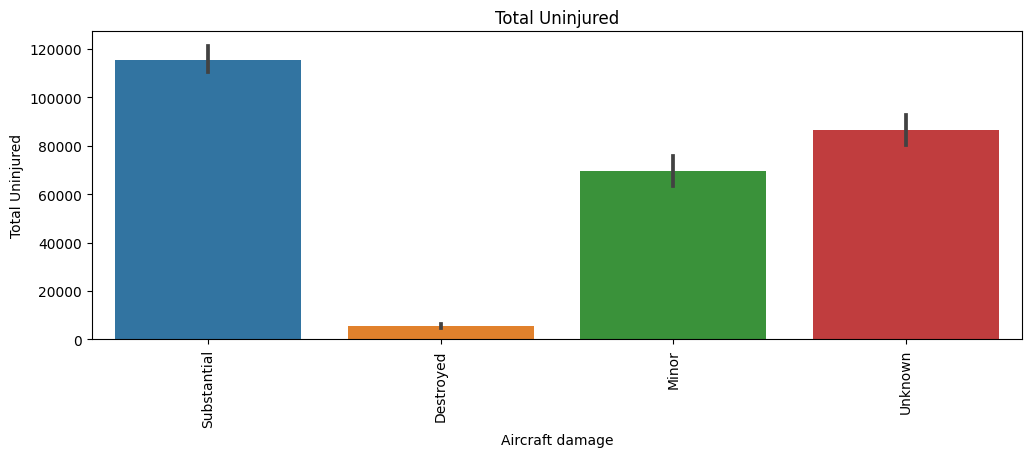

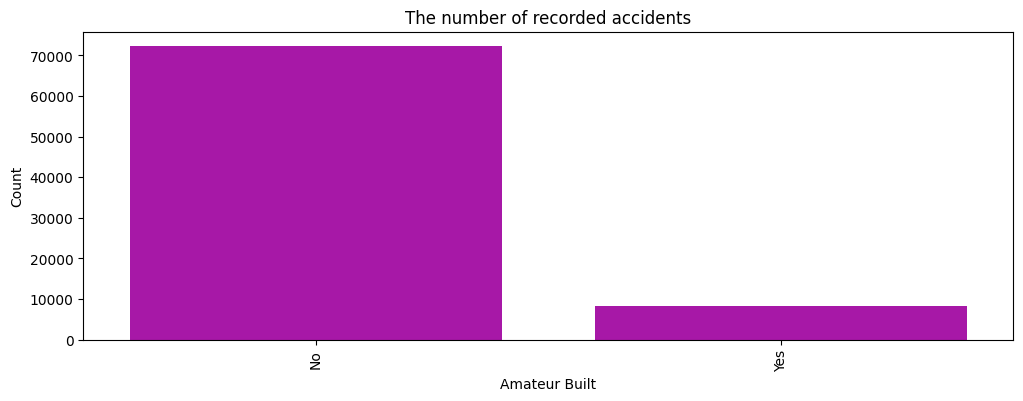

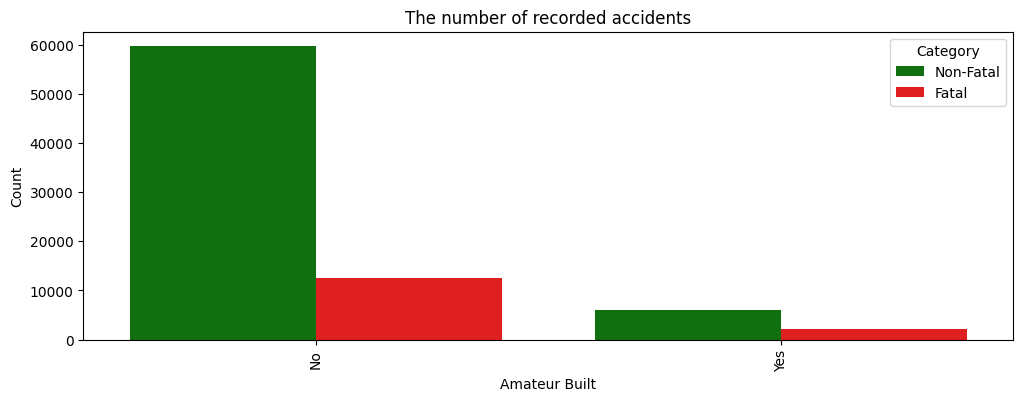

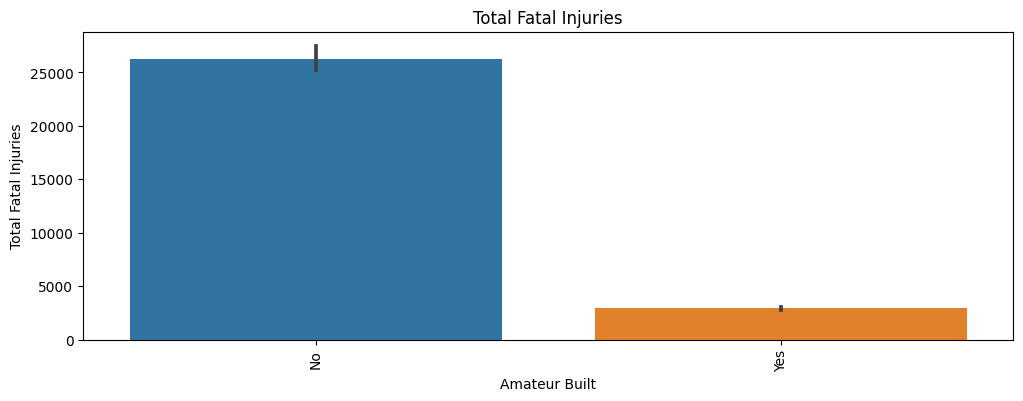

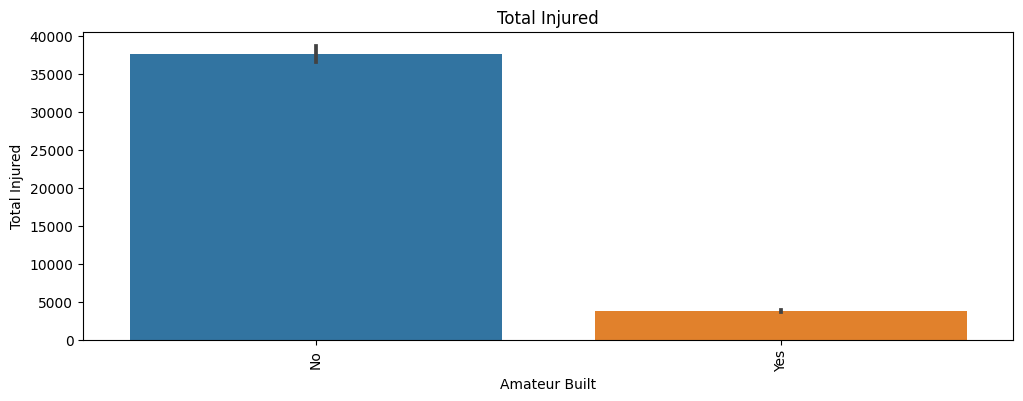

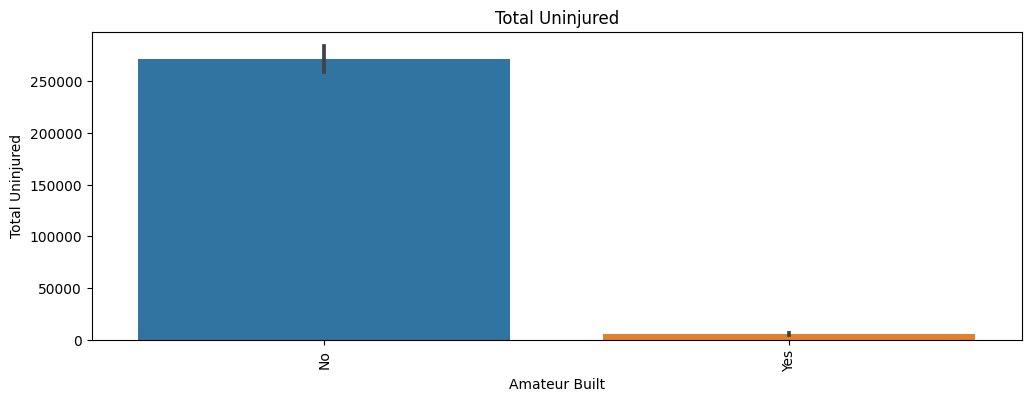

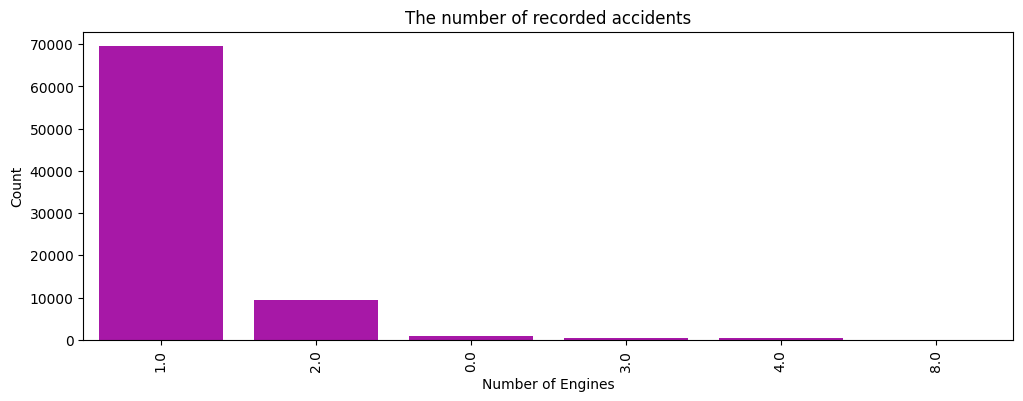

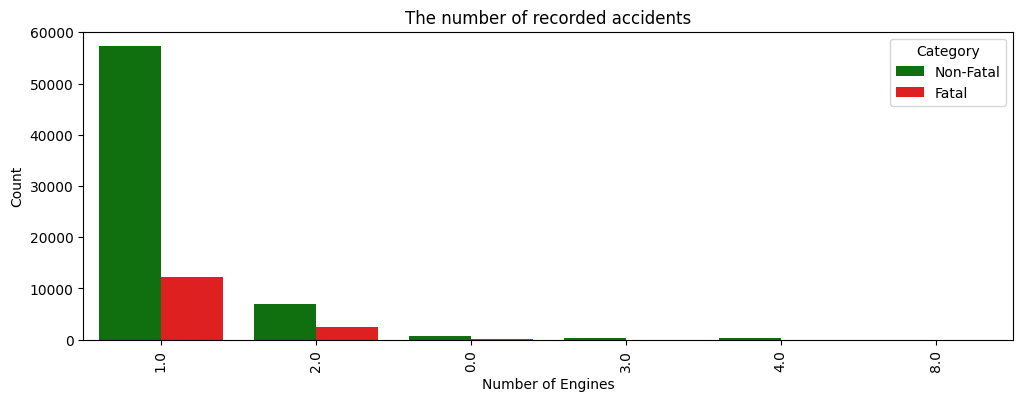

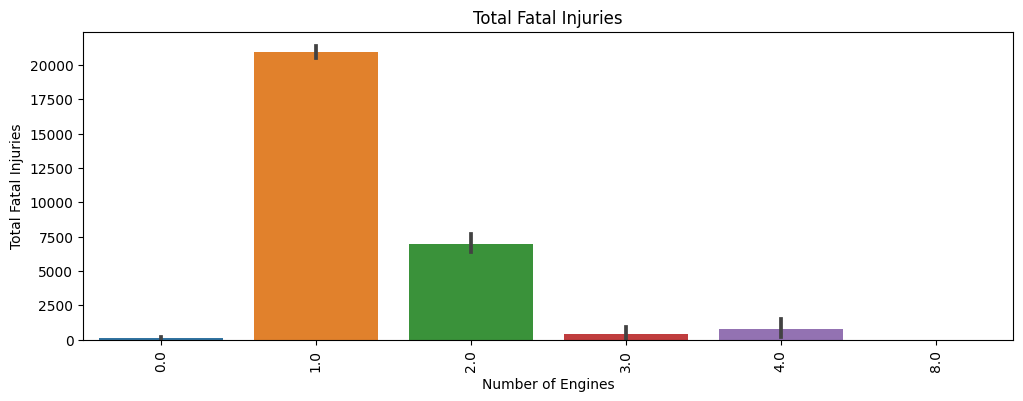

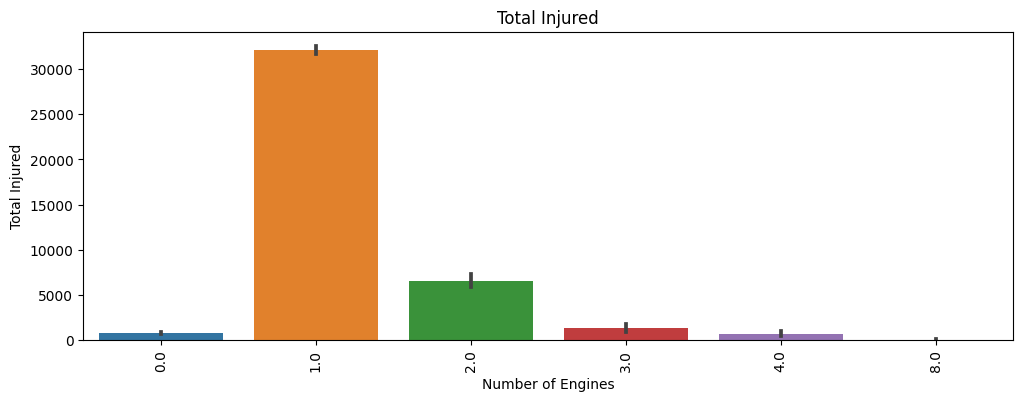

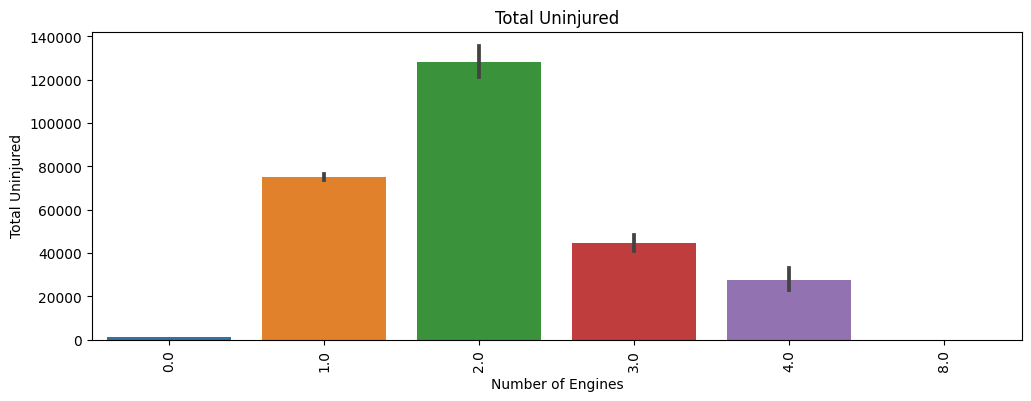

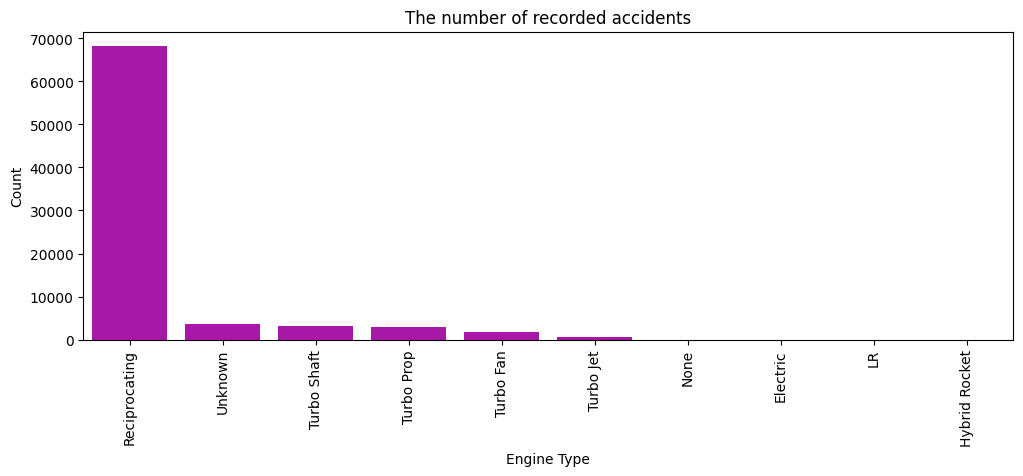

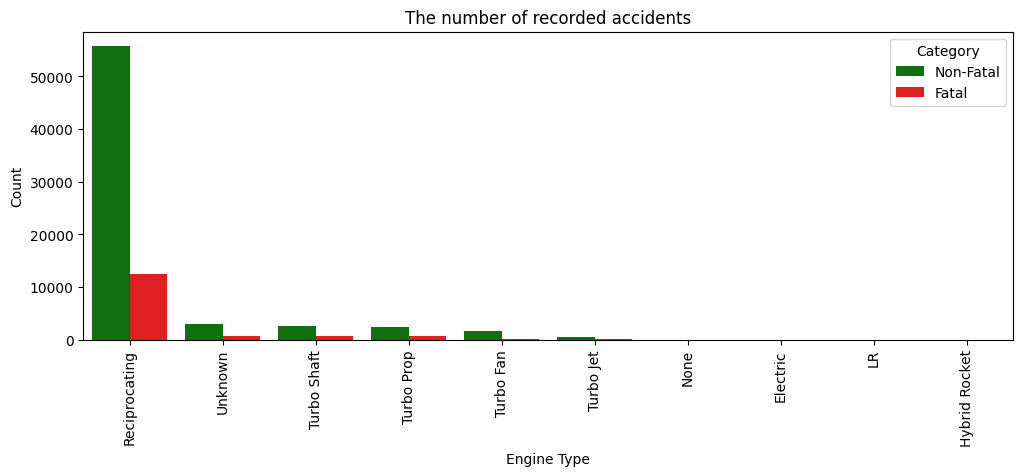

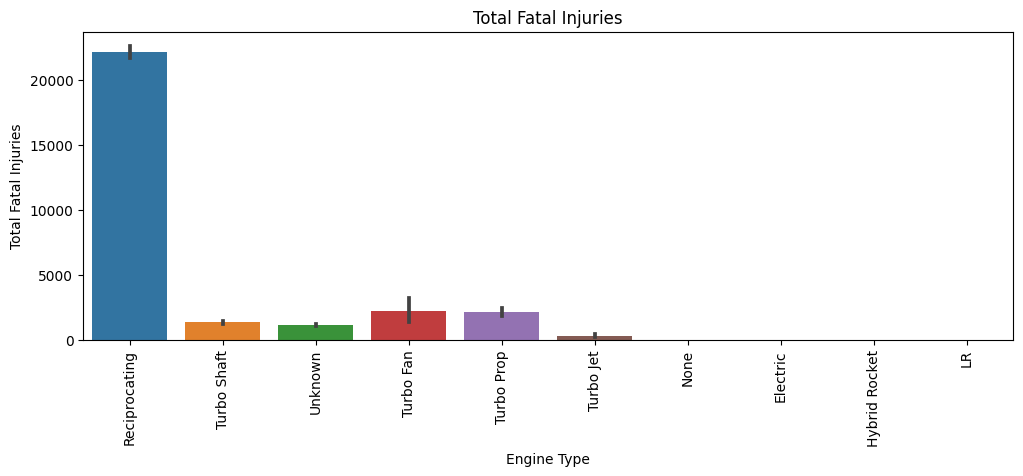

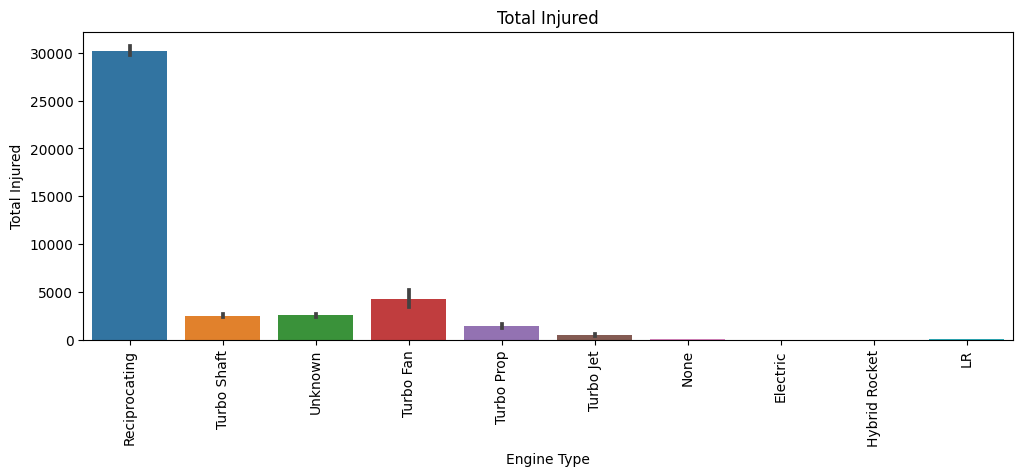

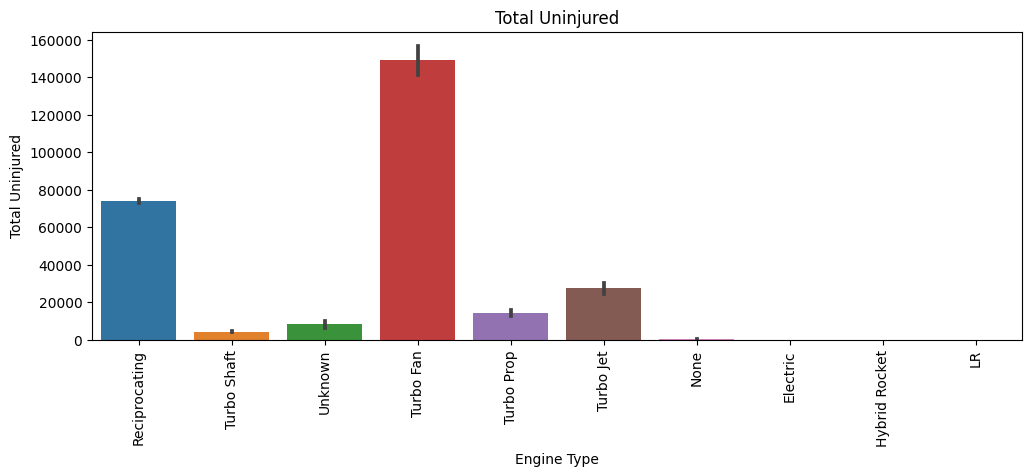

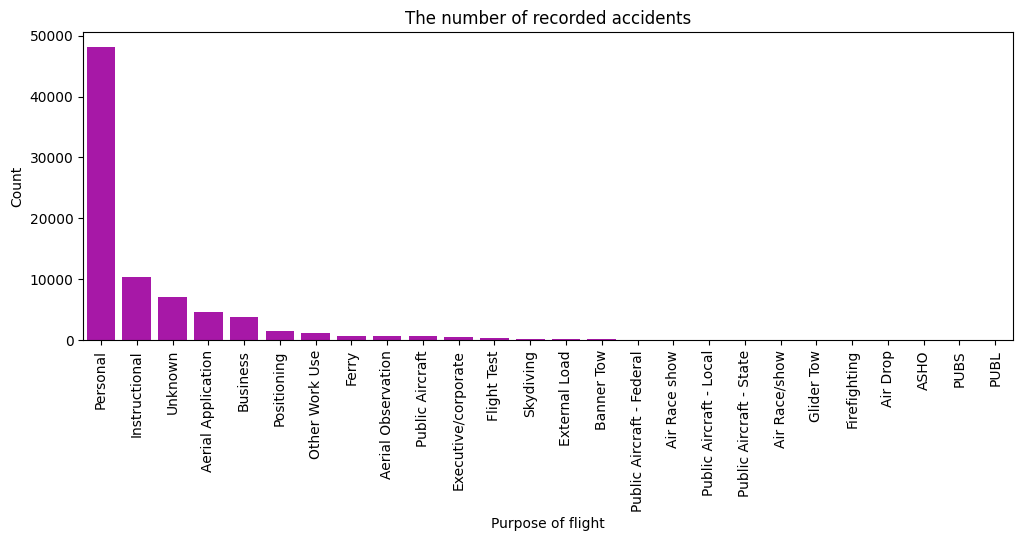

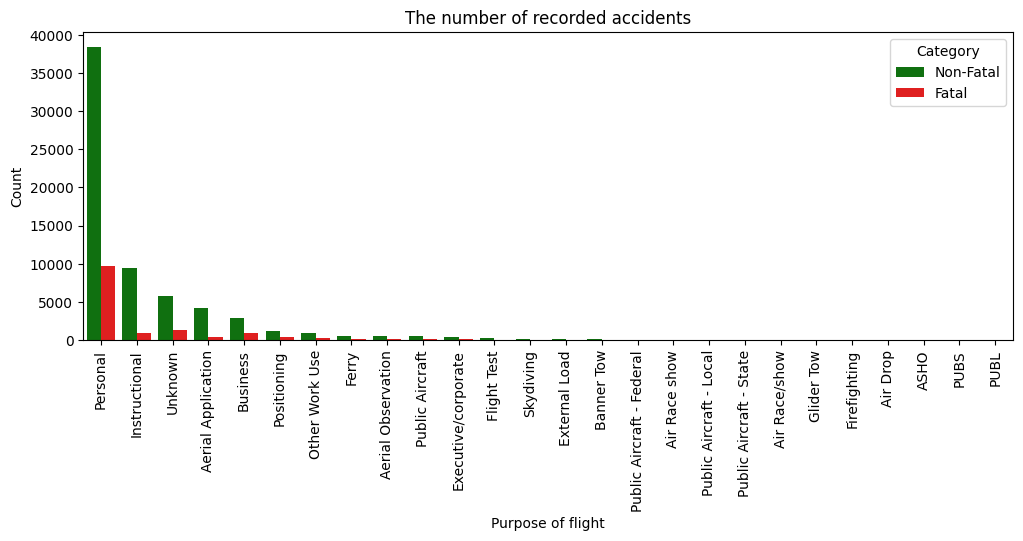

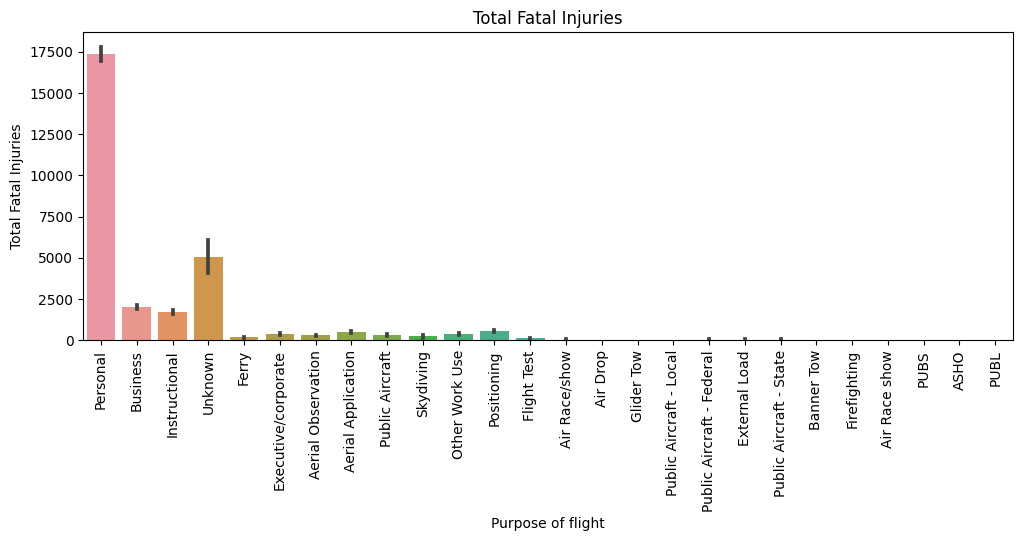

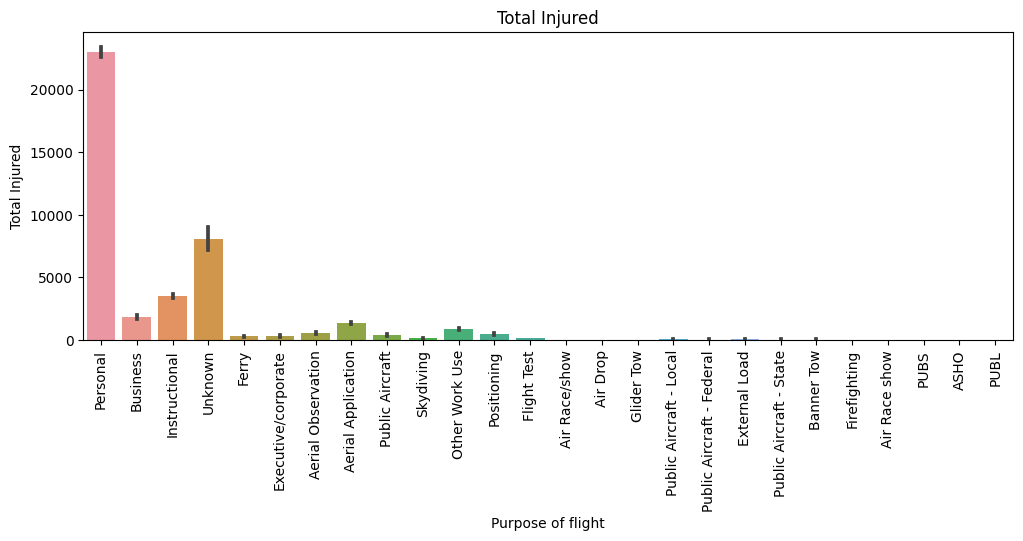

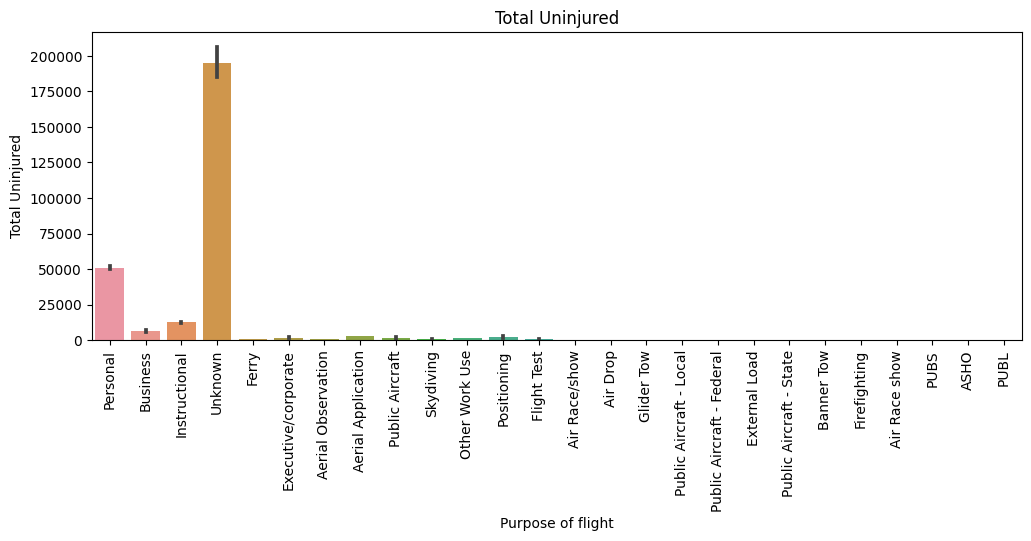

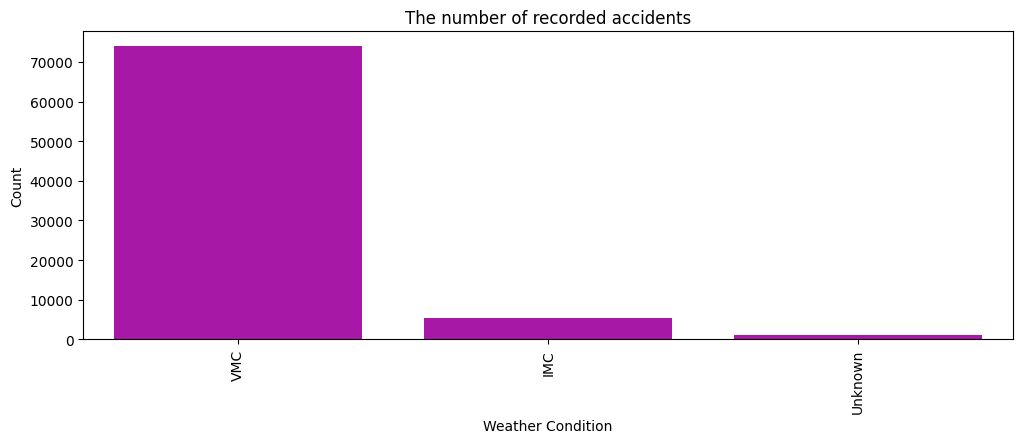

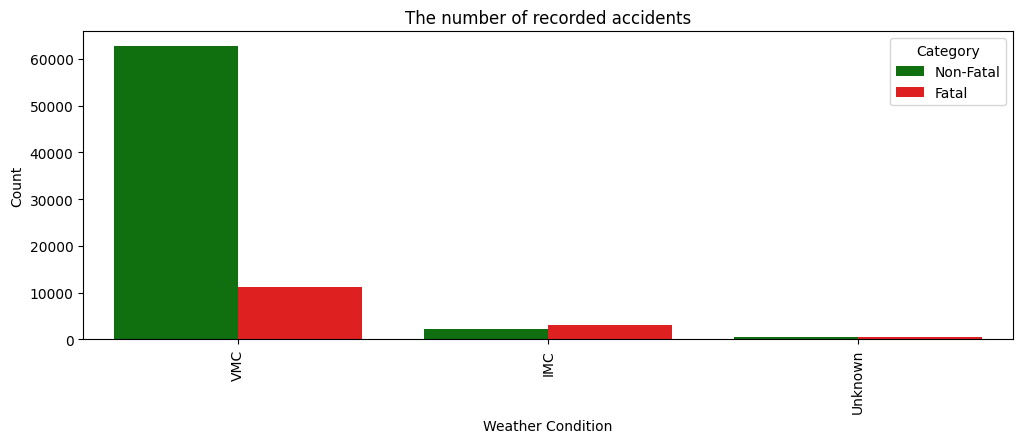

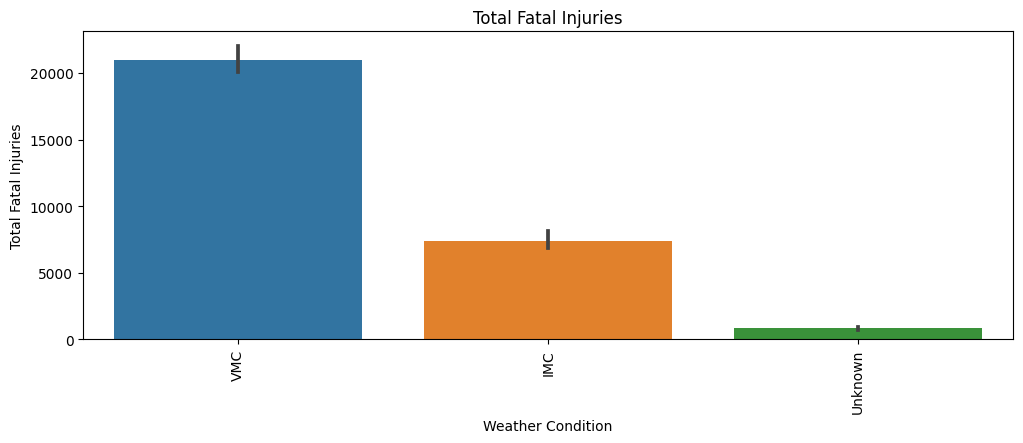

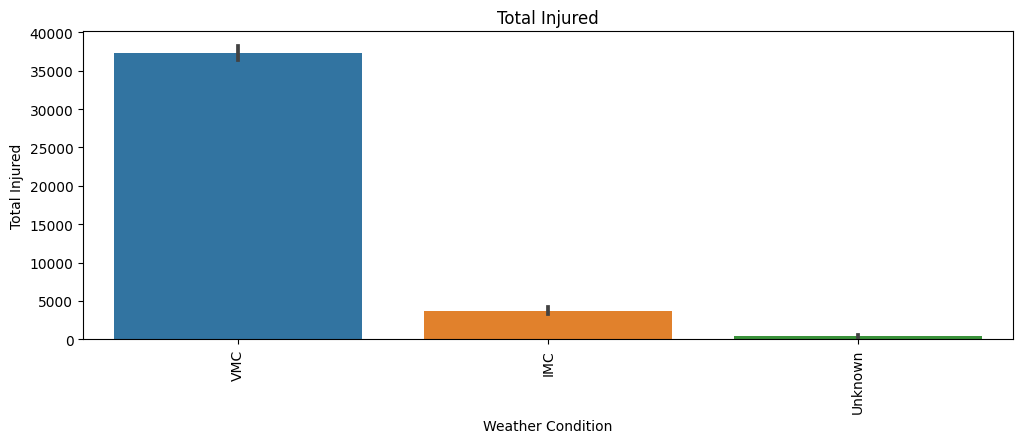

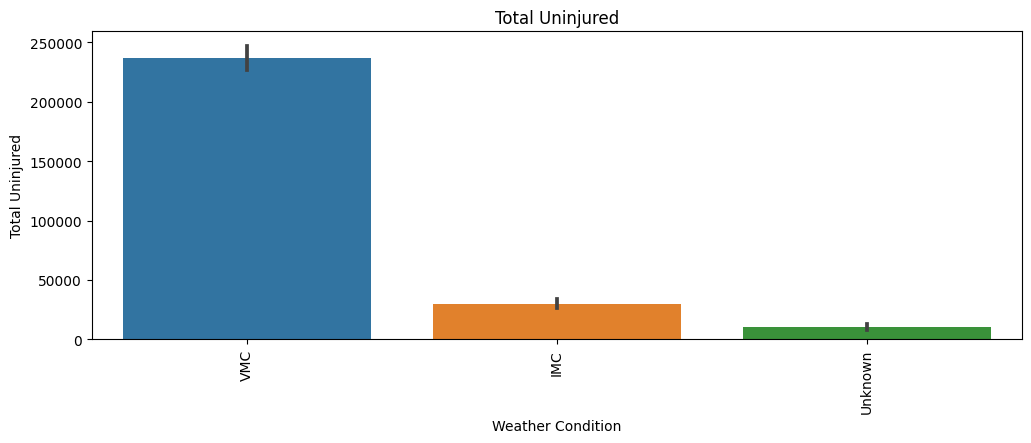

In [41]:
draw_charts (data, columns_x, columns_y, ('Category'))

#### Conclusions for the charts above:
1) Year: the number of cases is decreasing every year and in 2020 there were 2.5 times fewer incidents than in 1982;

2) Month: most cases were recorded in July, August and June, this may be related to the fact that during this period people travel a lot, because it is summer and children have holidays. A little less cases were recorded in May and September and this might be also due to the fact that it is a warm period. The lowest number of cases is recorded in winter, when most people spend time at home and it may be due to family holidays;

3) Board phase of flight: unfortunately, a large number of incidents don’t have information about broad phases of flight, so leaving this aside, we see that the most dangerous flight phases, when accidents happen,  are 1. landing, 2. takeoff, 3. cruise, 4. maneuvering, 5.approach. Although most accidents occurred during landing there are only 1,8% fatalities, while during maneuvering are 39% fatalities.

4) Amateur Built: most incidents involved planes that were not built by amateurs, but this is related to the fact that there are many more such planes in the world. Planes are manufactured in factories and airports cannot use planes whitch are build by amateurs because they are not safe. In disasters when planes had built by amateurs, more than 27% of the victims didn't survive, while when planes had built by amateurs, more than 17% of the victims didn't survive;

5) Number of Engines: planes with one engines more often have accidents and it's safer to choose fly a plane which has more than 2 engines;

6) Engine Type: planes with reciprocating engine more often have accidents;

7) Weather Condition: more accidents happen during VMC conditions. Although there are 15% fatalities, while IMC - 57% fatalities.(*VMC conditions describe the weather conditions and situations in which a pilot can sufficiently and safely maintain visuals of all other aircraft and the terrain around them.  IMC conditions describe a situation in which visibility and the weather require the pilot to rely on their instruments, and thus conduct an IFR flight. This is typically done when flying through clouds, as well as general bad weather);

8) ‘Purpose of fly’: don't have impact on accidents, because it is obvious that more people fly for a personal purpose.
